<a href="https://colab.research.google.com/github/maximebarbier01/education/blob/main/Exploration_indicateurs_de_valeurs_ajout%C3%A9s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librairies 📚

In [1]:
# Data manipulation

import pandas as pd
import numpy as np

# Data visualization

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import plotly.express as px

# afficher toutes les colonnes
pd.set_option("display.max_columns", None)

# Import des données 📥

In [401]:
ind_lycees = pd.read_csv("/content/fr-en-indicateurs-de-resultat-des-lycees-denseignement-general-et-technologique.csv",sep=';')
ind_lycees.head()

/tmp/ipython-input-401-305838399.py:1: DtypeWarning:

Columns (47,48,49,51,52,53,55,56,57,58,59,71,72,73,74,75,76,77,78,79,80,81,95,98,100,105,106,107,113,115,126,134,136) have mixed types. Specify dtype option on import or set low_memory=False.



,Etablissement,Annee,Ville,UAI,Code commune,Academie,Departement,Secteur,Presents - L,Presents - ES,Presents - S,Presents - STG,Presents - STI2D,Presents - STD2A,Presents - STMG,Presents - STI,Presents - STL,Presents - ST2S,Presents - TMD,Presents - STHR,Presents - Toutes series,Taux de reussite - L,Taux de reussite - ES,Taux de reussite - S,Taux de reussite - STG,Taux de reussite - STI2D,Taux de reussite - STD2A,Taux de reussite - STMG,Taux de reussite - STI,Taux de reussite - STL,Taux de reussite - ST2S,Taux de reussite - TMD,Taux de reussite - STHR,Taux de reussite - Toutes series,Taux de reussite attendu acad - L,Taux de reussite attendu acad - ES,Taux de reussite attendu acad - S,Taux de reussite attendu acad - STG,Taux de reussite attendu acad - STI2D,Taux de reussite attendu acad - STD2A,Taux de reussite attendu acad - STMG,Taux de reussite attendu acad - STI,Taux de reussite attendu acad - STL,Taux de reussite attendu acad - ST2S,Taux de reussite attendu acad - TMD,Taux de reussite attendu acad - STHR,Taux de reussite attendu acad - Toutes series,Taux de reussite attendu france - L,Taux de reussite attendu france - ES,Taux de reussite attendu france - S,Taux de reussite attendu france - STG,Taux de reussite attendu france - STI2D,Taux de reussite attendu france - STD2A,Taux de reussite attendu france - STMG,Taux de reussite attendu france - STI,Taux de reussite attendu france - STL,Taux de reussite attendu france - ST2S,Taux de reussite attendu france - TMD,Taux de reussite attendu france - STHR,Taux de reussite attendu france - Toutes series,Taux de mentions - L,Taux de mentions - ES,Taux de mentions - S,Taux de mentions - STI2D,Taux de mentions - STD2A,Taux de mentions - STMG,Taux de mentions - STL,Taux de mentions - ST2S,Taux de mentions - TMD,Taux de mentions - STHR,Taux de mentions - Toutes series,Taux de mentions attendu - L,Taux de mentions attendu - ES,Taux de mentions attendu - S,Taux de mentions attendu - STI2D,Taux de mentions attendu - STD2A,Taux de mentions attendu - STMG,Taux de mentions attendu - STL,Taux de mentions attendu - ST2S,Taux de mentions attendu - TMD,Taux de mentions attendu - STHR,Taux de mentions attendu - Toutes series,Structure pedagogique 5 groupes,Structure pedagogique 7 groupes,Pourcentage bacheliers sortants 2de 1re Terminale Etablissement,Pourcentage bacheliers sortants Terminales Etablissement,Pourcentage bacheliers sortants 2de 1re Terminale Acad,Pourcentage bacheliers sortants Terminale Acad,Pourcentage bacheliers sortants 2de 1re Terminale France,Pourcentage bacheliers sortants Terminale France,Effectif de seconde,Effectif de premiere,Effectif de terminale,Taux d'acces 2nde-bac,Taux d'acces attendu acad 2nde-bac,Taux d'acces attendu france 2nde-bac,Taux d'acces 1ere-bac,Taux d'acces attendu acad 1ere-bac,Taux d'acces attendu france 1ere-bac,Taux d'acces terminale-bac,Taux d'acces attendu france terminale-bac,Region,Code region,Code departement,Libelle departement,Valeur ajoutee du taux de reussite - Toutes series,Valeur ajoutee du taux d'acces 2nde-bac,Valeur ajoutee du taux de mentions - Toutes series,Valeur ajoutee du taux de reussite - L,Valeur ajoutee du taux de reussite - ES,Valeur ajoutee du taux de reussite - S,Valeur ajoutee du taux de reussite - STG,Valeur ajoutee du taux de reussite - STI2D,Valeur ajoutee du taux de reussite - STD2A,Valeur ajoutee du taux de reussite - STMG,Valeur ajoutee du taux de reussite - STI,Valeur ajoutee du taux de reussite - STL,Valeur ajoutee du taux de reussite - ST2S,Valeur ajoutee du taux de reussite - TMD,Valeur ajoutee du taux de reussite - STHR,Valeur ajoutee du taux d'acces 1ere-bac,Valeur ajoutee du taux d'acces terminale-bac,Valeur ajoutee du taux de mentions - L,Valeur ajoutee du taux de mentions - ES,Valeur ajoutee du taux de mentions - S,Valeur ajoutee du taux de mentions - STI2D,Valeur ajoutee du taux de mentions - STD2A,Valeur ajoutee du taux de mentions - STMG,Valeur ajoutee du taux de mentions - STL,Valeur ajoutee du taux de me

In [3]:
ind_colleges = pd.read_csv("/content/fr-en-indicateurs-valeur-ajoutee-colleges.csv",sep=';')
ind_colleges.head()

,num_ligne,Session,UAI,Nom de l'établissement,Commune,Code région académique,Région académique,Code académie,Académie,Code département,Département,Secteur,Nb candidats G,Taux de réussite G,VA du taux de réussite G,Nb candidats P,Taux de réussite P,Note à l'écrit G,VA de la note G,Note à l'écrit P,Taux d'accès 6eme 3eme,Part présents 3eme ordinaire total,Part présents 3eme ordinaire G,Part présents 3eme ordinaire P,Part présents 3eme segpa total,Nb mentions AB G,Nb mentions B G,Nb mentions TB G,Nb mentions global G
0,5,2022,0030009U,COLLEGE EMILE GUILLAUMIN,COSNE D ALLIER,1,AUVERGNE-RHONE-ALPES,6,CLERMONT-FERRAND,03,ALLIER,PU,67,88.0,-1.0,NaN,NaN,9.6,-0.3,NaN,93.0,100.0,100.0,NaN,NaN,14,15,21,50
1,13,2022,0030092J,COLLEGE LUCIEN COLON,LAPALISSE,1,AUVERGNE-RHONE-ALPES,6,CLERMONT-FERRAND,03,ALLIER,PU,72,81.0,-7.0,NaN,NaN,8.8,-1.0,NaN,88.0,96.0,96.0,NaN,NaN,17,13,14,44
2,29,2022,0030892D,COLLEGE BLAISE DE VIGENERE,SAINT POURCAIN SUR SIOULE,1,AUVERGNE-RHONE-ALPES,6,CLERMONT-FERRAND,03,ALLIER,PU,113,86.0,-4.0,NaN,NaN,8.8,-1.3,NaN,88.0,99.0,99.0,NaN,NaN,27,24,20,71
3,30,2022,0031010G,COLLEGE VICTOR HUGO,SAINT YORRE,1,AUVERGNE-RHONE-ALPES,6,CLERMONT-FERRAND,03,ALLIER,PU,74,80.0,-14.0,NaN,NaN,11.3,0.4,NaN,91.0,99.0,99.0,NaN,NaN,16,14,21,51
4,32,2022,0030047K,COLLEGE ALAIN FOURNIER,VALLON EN SULLY,1,AUVERGNE-RHONE-ALPES,6,CLERMONT-FERRAND,03,ALLIER,PU,49,94.0,3.0,NaN,NaN,9.3,-1.0,NaN,91.0,100.0,98.0,2.0,NaN,12,6,10,28


# 1 - Nettoyage et préparation des données 🧹

## indicateurs lycées - ind_lycees

### Réduction du nombre de colonnes

In [402]:
ind_lycees_copy = ind_lycees

In [403]:
ind_lycees_copy.sample(2)

,Etablissement,Annee,Ville,UAI,Code commune,Academie,Departement,Secteur,Presents - L,Presents - ES,Presents - S,Presents - STG,Presents - STI2D,Presents - STD2A,Presents - STMG,Presents - STI,Presents - STL,Presents - ST2S,Presents - TMD,Presents - STHR,Presents - Toutes series,Taux de reussite - L,Taux de reussite - ES,Taux de reussite - S,Taux de reussite - STG,Taux de reussite - STI2D,Taux de reussite - STD2A,Taux de reussite - STMG,Taux de reussite - STI,Taux de reussite - STL,Taux de reussite - ST2S,Taux de reussite - TMD,Taux de reussite - STHR,Taux de reussite - Toutes series,Taux de reussite attendu acad - L,Taux de reussite attendu acad - ES,Taux de reussite attendu acad - S,Taux de reussite attendu acad - STG,Taux de reussite attendu acad - STI2D,Taux de reussite attendu acad - STD2A,Taux de reussite attendu acad - STMG,Taux de reussite attendu acad - STI,Taux de reussite attendu acad - STL,Taux de reussite attendu acad - ST2S,Taux de reussite attendu acad - TMD,Taux de reussite attendu acad - STHR,Taux de reussite attendu acad - Toutes series,Taux de reussite attendu france - L,Taux de reussite attendu france - ES,Taux de reussite attendu france - S,Taux de reussite attendu france - STG,Taux de reussite attendu france - STI2D,Taux de reussite attendu france - STD2A,Taux de reussite attendu france - STMG,Taux de reussite attendu france - STI,Taux de reussite attendu france - STL,Taux de reussite attendu france - ST2S,Taux de reussite attendu france - TMD,Taux de reussite attendu france - STHR,Taux de reussite attendu france - Toutes series,Taux de mentions - L,Taux de mentions - ES,Taux de mentions - S,Taux de mentions - STI2D,Taux de mentions - STD2A,Taux de mentions - STMG,Taux de mentions - STL,Taux de mentions - ST2S,Taux de mentions - TMD,Taux de mentions - STHR,Taux de mentions - Toutes series,Taux de mentions attendu - L,Taux de mentions attendu - ES,Taux de mentions attendu - S,Taux de mentions attendu - STI2D,Taux de mentions attendu - STD2A,Taux de mentions attendu - STMG,Taux de mentions attendu - STL,Taux de mentions attendu - ST2S,Taux de mentions attendu - TMD,Taux de mentions attendu - STHR,Taux de mentions attendu - Toutes series,Structure pedagogique 5 groupes,Structure pedagogique 7 groupes,Pourcentage bacheliers sortants 2de 1re Terminale Etablissement,Pourcentage bacheliers sortants Terminales Etablissement,Pourcentage bacheliers sortants 2de 1re Terminale Acad,Pourcentage bacheliers sortants Terminale Acad,Pourcentage bacheliers sortants 2de 1re Terminale France,Pourcentage bacheliers sortants Terminale France,Effectif de seconde,Effectif de premiere,Effectif de terminale,Taux d'acces 2nde-bac,Taux d'acces attendu acad 2nde-bac,Taux d'acces attendu france 2nde-bac,Taux d'acces 1ere-bac,Taux d'acces attendu acad 1ere-bac,Taux d'acces attendu france 1ere-bac,Taux d'acces terminale-bac,Taux d'acces attendu france terminale-bac,Region,Code region,Code departement,Libelle departement,Valeur ajoutee du taux de reussite - Toutes series,Valeur ajoutee du taux d'acces 2nde-bac,Valeur ajoutee du taux de mentions - Toutes series,Valeur ajoutee du taux de reussite - L,Valeur ajoutee du taux de reussite - ES,Valeur ajoutee du taux de reussite - S,Valeur ajoutee du taux de reussite - STG,Valeur ajoutee du taux de reussite - STI2D,Valeur ajoutee du taux de reussite - STD2A,Valeur ajoutee du taux de reussite - STMG,Valeur ajoutee du taux de reussite - STI,Valeur ajoutee du taux de reussite - STL,Valeur ajoutee du taux de reussite - ST2S,Valeur ajoutee du taux de reussite - TMD,Valeur ajoutee du taux de reussite - STHR,Valeur ajoutee du taux d'acces 1ere-bac,Valeur ajoutee du taux d'acces terminale-bac,Valeur ajoutee du taux de mentions - L,Valeur ajoutee du taux de mentions - ES,Valeur ajoutee du taux de mentions - S,Valeur ajoutee du taux de mentions - STI2D,Valeur ajoutee du taux de mentions - STD2A,Valeur ajoutee du taux de mentions - STMG,Valeur ajoutee du taux de mentions - STL,Valeur ajoutee du taux de me

On va essayer de réduire le nombre d'indifcateur en regroupant toutes les séries (Générale (G) et technique (T))

In [404]:
# Nombre de mention TB avec félicitations
ind_lycees_copy['Nombre de mentions TB avec félicitations'] = ind_lycees_copy['Nombre de mentions TB avec félicitations - G'] + ind_lycees_copy['Nombre de mentions TB avec félicitations - T']
ind_lycees_copy.drop(columns=['Nombre de mentions TB avec félicitations - G','Nombre de mentions TB avec félicitations - T'],inplace=True)

In [405]:
# Nombre de mention TB sans félicitations
ind_lycees_copy['Nombre de mentions TB sans félicitations'] = ind_lycees_copy['Nombre de mentions TB sans félicitations - G'] + ind_lycees_copy['Nombre de mentions TB sans félicitations - T']
ind_lycees_copy.drop(columns=['Nombre de mentions TB sans félicitations - G','Nombre de mentions TB sans félicitations - T'],inplace=True)

In [406]:
# Nombre de mention B
ind_lycees_copy['Nombre de mentions B'] = ind_lycees_copy['Nombre de mentions B - G'] + ind_lycees_copy['Nombre de mentions B - T']
ind_lycees_copy.drop(columns=['Nombre de mentions B - G','Nombre de mentions B - T'],inplace=True)

In [407]:
# Nombre de mention AB
ind_lycees_copy['Nombre de mentions AB'] = ind_lycees_copy['Nombre de mentions AB - G'] + ind_lycees_copy['Nombre de mentions AB - T']
ind_lycees_copy.drop(columns=['Nombre de mentions AB - G','Nombre de mentions AB - T'],inplace=True)

In [408]:
# Suppression des colonnes 'Presents'
ind_lycees_copy = ind_lycees_copy.drop(
    columns=[col for col in ind_lycees_copy.columns if 'Presents' in col]
)

In [409]:
# Suppression des colonnes 'attendu'
ind_lycees_copy = ind_lycees_copy.drop(
    columns=[col for col in ind_lycees_copy.columns if 'attendu' in col]
)

In [410]:
# Suppression des colonnes 'Structure'
ind_lycees_copy = ind_lycees_copy.drop(
    columns=[col for col in ind_lycees_copy.columns if 'Structure' in col]
)

In [411]:
# Suppression des colonnes 'acad'
ind_lycees_copy = ind_lycees_copy.drop(
    columns=[col for col in ind_lycees_copy.columns if 'acad' in col]
)

In [412]:
# Suppression des colonnes 'Acad'
ind_lycees_copy = ind_lycees_copy.drop(
    columns=[col for col in ind_lycees_copy.columns if 'acad' in col]
)

In [413]:
# Suppression des colonnes 'France'
ind_lycees_copy = ind_lycees_copy.drop(
    columns=[col for col in ind_lycees_copy.columns if 'France' in col]
)

In [414]:
# Suppression des colonnes 'Code'
ind_lycees_copy = ind_lycees_copy.drop(
    columns=[col for col in ind_lycees_copy.columns if 'Code' in col]
)

In [415]:
# Suppression des colonnes 'Gnle'
ind_lycees_copy = ind_lycees_copy.drop(
    columns=[col for col in ind_lycees_copy.columns if 'Gnle' in col]
)

In [416]:
# Suppression des colonnes Taux de réussite par spécialité
ind_lycees_copy.drop(columns=[
    'Taux de reussite - L'
    ,'Taux de reussite - ES'
    ,'Taux de reussite - S'
    ,'Taux de reussite - STG'
    ,'Taux de reussite - STI2D'
    ,'Taux de reussite - STD2A'
    ,'Taux de reussite - STMG'
    ,'Taux de reussite - STI'
    ,'Taux de reussite - STL'
    ,'Taux de reussite - ST2S'
    ,'Taux de reussite - TMD'
    ,'Taux de reussite - STHR'
],inplace=True)

In [417]:
# Suppression des colonnes Taux de mentions par spécialité
ind_lycees_copy.drop(columns=[
    'Taux de mentions - L'
    ,'Taux de mentions - ES'
    ,'Taux de mentions - S'
    ,'Taux de mentions - STI2D'
    ,'Taux de mentions - STD2A'
    ,'Taux de mentions - STMG'
    ,'Taux de mentions - STL'
    ,'Taux de mentions - ST2S'
    ,'Taux de mentions - TMD'
    ,'Taux de mentions - STHR'
],inplace=True)

In [418]:
# Suppression des colonnes Valeur ajoutée du taux de réussite par spécialité
ind_lycees_copy.drop(columns=[
    'Valeur ajoutee du taux de reussite - L'
    ,'Valeur ajoutee du taux de reussite - ES'
    ,'Valeur ajoutee du taux de reussite - S'
    ,'Valeur ajoutee du taux de reussite - STG'
    ,'Valeur ajoutee du taux de reussite - STI2D'
    ,'Valeur ajoutee du taux de reussite - STD2A'
    ,'Valeur ajoutee du taux de reussite - STMG'
    ,'Valeur ajoutee du taux de reussite - STI'
    ,'Valeur ajoutee du taux de reussite - STL'
    ,'Valeur ajoutee du taux de reussite - ST2S'
    ,'Valeur ajoutee du taux de reussite - TMD'
    ,'Valeur ajoutee du taux de reussite - STHR'
],inplace=True)

In [419]:
# Suppression des colonnes Valeur ajoutée du taux de mentions par spécialité
ind_lycees_copy.drop(columns=[
    'Valeur ajoutee du taux de mentions - L'
    ,'Valeur ajoutee du taux de mentions - ES'
    ,'Valeur ajoutee du taux de mentions - S'
    ,'Valeur ajoutee du taux de mentions - STI2D'
    ,'Valeur ajoutee du taux de mentions - STD2A'
    ,'Valeur ajoutee du taux de mentions - STMG'
    ,'Valeur ajoutee du taux de mentions - STL'
    ,'Valeur ajoutee du taux de mentions - ST2S'
    ,'Valeur ajoutee du taux de mentions - TMD'
    ,'Valeur ajoutee du taux de mentions - STHR'
],inplace=True)

### Valeurs nulles ❌

In [420]:
ind_lycees_copy.isna().mean().sort_values(ascending=False)

,0
Nombre de mentions TB avec félicitations,0.992952
Nombre de mentions TB sans félicitations,0.926676
Nombre de mentions B,0.882516
Nombre de mentions AB,0.878956
Pourcentage bacheliers sortants Terminale Acad,0.752086
Pourcentage bacheliers sortants 2de 1re Terminale Etablissement,0.752086
Pourcentage bacheliers sortants Terminales Etablissement,0.752086
Pourcentage bacheliers sortants 2de 1re Terminale Acad,0.752086
Valeur ajoutee du taux de mentions - Toutes series,0.419591
Taux de mentions - Toutes series,0.416966


### Suppression des doublons 👥

In [421]:
ind_lycees_copy.duplicated().value_counts(normalize=True)

,proportion
False,1.0


### Conversion des types de données 🛐

In [425]:
ind_lycees_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27808 entries, 0 to 27807
Data columns (total 30 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Etablissement                                                    27808 non-null  object        
 1   Annee                                                            27808 non-null  datetime64[ns]
 2   Ville                                                            27808 non-null  object        
 3   UAI                                                              27808 non-null  object        
 4   Academie                                                         27808 non-null  object        
 5   Departement                                                      27808 non-null  object        
 6   Secteur                                                          27808 non-nul

In [423]:
# Convertion de la colonne 'Annee' en date
ind_lycees_copy['Annee'] = pd.to_datetime(ind_lycees_copy['Annee'], format="%Y")
ind_lycees_copy['Annee'] = pd.to_datetime(ind_lycees_copy['Annee'], format="%Y-%m-%d")

In [424]:
# Convertion des colonne 'Valeur ajoutée' en float
for col in ind_lycees_copy.columns:
    if 'Valeur ajoutee' in col or 'Valeur ajoutée' in col:
        ind_lycees_copy[col] = pd.to_numeric(ind_lycees_copy[col], downcast='float', errors='coerce')

### Renommer les colonnes 🖊️

In [426]:
# formateur toutes les colonnes en minuscule
ind_lycees_copy.columns = [col.lower() for col in ind_lycees_copy.columns]

In [427]:
# suppression des '-'
ind_lycees_copy.columns = [col.replace('-',' ') for col in ind_lycees_copy.columns]

In [428]:
# suppresion des espaces
ind_lycees_copy.columns = [col.replace(' ','_') for col in ind_lycees_copy.columns]

In [432]:
# Suppression des '
ind_lycees_copy.columns = [col.replace("'",'_') for col in ind_lycees_copy.columns]

In [429]:
# Dernier cleaning
ind_lycees_copy.columns = [col.replace('___','_') for col in ind_lycees_copy.columns]

In [435]:
# Changement du nom des colonnes
ind_lycees_copy.rename(columns={
    'taux_de_reussite_toutes_series' : 'taux_de_reussite'
    ,'taux_de_mentions_toutes_series' : 'taux_de_mentions'
    ,'pourcentage_bacheliers_sortants_2de_1re_terminale_etablissement' : 'part_bacheliers_sortants_2de_1re_term'
    ,'pourcentage_bacheliers_sortants_terminales_etablissement' : 'part_bacheliers_sortants_term'
    ,'effectif_de_seconde' : 'effectif_de_2de'
    ,'effectif_de_premiere' : 'effectif_de_1re'
    ,'effectif_de_terminale' : 'effectif_de_term'
    ,"taux_d_acces_terminale_bac" : 'taux_d_acces_term_bac'
    ,'libelle_departement' : 'departement'
    ,'valeur_ajoutee_du_taux_de_reussite_toutes_series' : 'VA_du_taux_de_reussite'
    ,'valeur_ajoutee_du_taux_d_acces_2nde_bac' : 'VA_du_taux_d_acces_2nde_bac'
    ,'valeur_ajoutee_du_taux_de_mentions_toutes_series' : 'VA_du_taux_de_mentions'
    ,'valeur_ajoutee_du_taux_d_acces_1ere_bac' : 'VA_du_taux_d_acces_1ere_bac'
    ,'valeur_ajoutee_du_taux_d_acces_terminale_bac' : 'VA_du_taux_d_acces_term_bac'
},inplace=True)
ind_lycees_copy.drop(columns=[
    'pourcentage_bacheliers_sortants_2de_1re_terminale_acad'
    ,'pourcentage_bacheliers_sortants_terminale_acad'
],inplace=True)

In [436]:
ind_lycees_copy.sample(1)

,etablissement,annee,ville,uai,academie,departement,secteur,taux_de_reussite,taux_de_mentions,part_bacheliers_sortants_2de_1re_term,part_bacheliers_sortants_term,effectif_de_2de,effectif_de_1re,effectif_de_term,taux_d_acces_2nde_bac,taux_d_acces_1ere_bac,taux_d_acces_term_bac,region,departement,VA_du_taux_de_reussite,VA_du_taux_d_acces_2nde_bac,VA_du_taux_de_mentions,VA_du_taux_d_acces_1ere_bac,VA_du_taux_d_acces_term_bac,nombre_de_mentions_tb_avec_félicitations,nombre_de_mentions_tb_sans_félicitations,nombre_de_mentions_b,nombre_de_mentions_ab
24596,LYCEE STANISLAS,2014-01-01,CANNES,0060673Z,NICE,ALPES-MARITIMES,privé sous contrat,99.0,NaN,79.0,100.0,201.0,182.0,NaN,78.0,92.0,NaN,PROVENCE-ALPES-COTE D'AZUR,Alpes-Maritimes,0.0,-4.0,NaN,-2.0,NaN,NaN,NaN,NaN,NaN


### Export - clean 🚀

In [379]:
ind_lycees_copy.to_csv("ind_lycees_clean.csv")

## Indicateurs collèges - ind_colleges

### Valeurs nulles ❌

In [154]:
ind_colleges.head()

,num_ligne,Session,UAI,Nom de l'établissement,Commune,Code région académique,Région académique,Code académie,Académie,Code département,Département,Secteur,Nb candidats G,Taux de réussite G,VA du taux de réussite G,Nb candidats P,Taux de réussite P,Note à l'écrit G,VA de la note G,Note à l'écrit P,Taux d'accès 6eme 3eme,Part présents 3eme ordinaire total,Part présents 3eme ordinaire G,Part présents 3eme ordinaire P,Part présents 3eme segpa total,Nb mentions AB G,Nb mentions B G,Nb mentions TB G,Nb mentions global G
0,5,2022,0030009U,COLLEGE EMILE GUILLAUMIN,COSNE D ALLIER,1,AUVERGNE-RHONE-ALPES,6,CLERMONT-FERRAND,03,ALLIER,PU,67,88.0,-1.0,NaN,NaN,9.6,-0.3,NaN,93.0,100.0,100.0,NaN,NaN,14,15,21,50
1,13,2022,0030092J,COLLEGE LUCIEN COLON,LAPALISSE,1,AUVERGNE-RHONE-ALPES,6,CLERMONT-FERRAND,03,ALLIER,PU,72,81.0,-7.0,NaN,NaN,8.8,-1.0,NaN,88.0,96.0,96.0,NaN,NaN,17,13,14,44
2,29,2022,0030892D,COLLEGE BLAISE DE VIGENERE,SAINT POURCAIN SUR SIOULE,1,AUVERGNE-RHONE-ALPES,6,CLERMONT-FERRAND,03,ALLIER,PU,113,86.0,-4.0,NaN,NaN,8.8,-1.3,NaN,88.0,99.0,99.0,NaN,NaN,27,24,20,71
3,30,2022,0031010G,COLLEGE VICTOR HUGO,SAINT YORRE,1,AUVERGNE-RHONE-ALPES,6,CLERMONT-FERRAND,03,ALLIER,PU,74,80.0,-14.0,NaN,NaN,11.3,0.4,NaN,91.0,99.0,99.0,NaN,NaN,16,14,21,51
4,32,2022,0030047K,COLLEGE ALAIN FOURNIER,VALLON EN SULLY,1,AUVERGNE-RHONE-ALPES,6,CLERMONT-FERRAND,03,ALLIER,PU,49,94.0,3.0,NaN,NaN,9.3,-1.0,NaN,91.0,100.0,98.0,2.0,NaN,12,6,10,28


In [158]:
ind_colleges_clean = ind_colleges

In [167]:
ind_colleges.drop(columns="Taux de réussite P",inplace=True)

In [170]:
ind_colleges.isna().mean().sort_values(ascending=False)

,0
VA du taux de réussite G,0.058395
VA de la note G,0.058395
Taux d'accès 6eme 3eme,0.001646
Nom de l'établissement,0.000000
num_ligne,0.000000
Session,0.000000
UAI,0.000000
Région académique,0.000000
Code région académique,0.000000
Commune,0.000000


In [169]:
# Suppression des colonnes 'Code'
ind_colleges_clean = ind_colleges_clean.drop(
    columns=[col for col in ind_colleges_clean.columns if 'Code' in col]
    )

### Suppression des doublons 👥

In [172]:
ind_colleges_clean.duplicated().value_counts(normalize=True)

,proportion
False,1.0


### Conversion des types de données 🛐

In [176]:
ind_colleges_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20053 entries, 0 to 20052
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   num_ligne                           20053 non-null  int64  
 1   annee                               20053 non-null  int64  
 2   UAI                                 20053 non-null  object 
 3   Nom de l'établissement              20053 non-null  object 
 4   Commune                             20053 non-null  object 
 5   Région académique                   20053 non-null  object 
 6   Académie                            20053 non-null  object 
 7   Département                         20053 non-null  object 
 8   Secteur                             20053 non-null  object 
 9   Nb candidats G                      20053 non-null  int64  
 10  Taux de réussite G                  20053 non-null  float64
 11  VA du taux de réussite G            18882

In [175]:
ind_colleges_clean.rename(columns={
    'Session' : 'annee'
},inplace=True)

In [178]:
ind_colleges_clean['annee'] = pd.to_datetime(ind_lycees_clean['annee'], format="%Y-%m%-%d")

In [181]:
ind_colleges_clean.sample(4)

,num_ligne,annee,UAI,Nom de l'établissement,Commune,Région académique,Académie,Département,Secteur,Nb candidats G,Taux de réussite G,VA du taux de réussite G,Note à l'écrit G,VA de la note G,Taux d'accès 6eme 3eme,Part présents 3eme ordinaire total,Nb mentions AB G,Nb mentions B G,Nb mentions TB G,Nb mentions global G
5149,6029,2014-01-01,0530015D,COLLEGE PIERRE DUBOIS,LAVAL,PAYS DE LA LOIRE,NANTES,MAYENNE,PU,90,89.0,-3.0,10.5,-0.7,93.0,94.0,16,16,26,58
2344,11887,2021-01-01,0110068P,COLLEGE GEORGES BRASSENS,NARBONNE,OCCITANIE,MONTPELLIER,AUDE,PU,136,83.0,-2.0,10.0,0.0,92.0,99.0,32,25,27,84
7109,15503,2015-01-01,0100664T,COLLEGE PAUL LANGEVIN,LA CHAPELLE ST LUC,GRAND EST,REIMS,AUBE,PU,142,82.0,-9.0,10.3,-1.3,92.0,98.0,28,31,36,95
11673,17856,2023-01-01,0611156A,COLLEGE FRANCOISE DOLTO,L AIGLE,NORMANDIE,NORMANDIE,ORNE,PU,97,74.0,-6.0,9.1,-0.4,91.0,94.0,21,13,16,50


### Renommer les colonnes 🖊️

In [183]:
ind_colleges_clean.columns = [col.lower() for col in ind_colleges_clean.columns]
ind_colleges_clean.columns = [col.replace("'",'') for col in ind_colleges_clean.columns]
ind_colleges_clean.columns = [col.replace('-','') for col in ind_colleges_clean.columns]

In [185]:
ind_colleges_clean.columns = [col.replace(' ','_') for col in ind_colleges_clean.columns]

In [187]:
ind_colleges_clean.columns = [col.replace('é','e') for col in ind_colleges_clean.columns]

### Export - clean 🚀

In [189]:
ind_colleges_clean.to_csv("ind_colleges_clean.csv")

# 2 - Analyse exploratoire (EDA) 🔍

## Indicateurs colleges - ind_colleges_clean

In [212]:
ind_colleges_clean.sample(5)

,num_ligne,annee,uai,nom_de_letablissement,commune,region_academique,academie,departement,secteur,nb_candidats_g,taux_de_reussite_g,va_du_taux_de_reussite_g,note_à_lecrit_g,va_de_la_note_g,taux_daccès_6eme_3eme,part_presents_3eme_ordinaire_total,nb_mentions_ab_g,nb_mentions_b_g,nb_mentions_tb_g,nb_mentions_global_g,part_mention_ab_g,part_mentions_b_g,part_mentions_tb_g,part_mentions_global_g
10249,10927,2012-01-01,0141166S,COLLEGE PRIVE SAINT-MICHEL,HEROUVILLE ST CLAIR,NORMANDIE,NORMANDIE,CALVADOS,PR,37,86.0,-2.0,10.1,0.2,63.0,97.0,7,8,4,19,18.92,21.62,10.81,51.35
14627,12396,2021-01-01,0442542Z,COLLEGE ANDREE CHEDID,AIGREFEUILLE SUR MAINE,PAYS DE LA LOIRE,NANTES,LOIRE-ATLANTIQUE,PU,143,94.0,-3.0,12.4,-0.3,97.0,100.0,27,39,49,115,18.88,27.27,34.27,80.42
3512,17793,2019-01-01,0501830T,COLLEGE LEON JOZEAU MARIGNE,ISIGNY LE BUAT,NORMANDIE,NORMANDIE,MANCHE,PU,30,97.0,NaN,11.4,NaN,100.0,97.0,6,14,3,23,20.00,46.67,10.00,76.67
6448,12391,2018-01-01,0820824A,COLLEGE JEAN HONORE FRAGONARD,NEGREPELISSE,OCCITANIE,TOULOUSE,TARN-ET-GARONNE,PU,127,82.0,-10.0,11.3,0.3,92.0,96.0,27,19,33,79,21.26,14.96,25.98,62.20
17692,8077,2022-01-01,0280756V,COLLEGE JEAN MOULIN,CHARTRES,CENTRE-VAL DE LOIRE,ORLEANS-TOURS,EURE-ET-LOIR,PU,45,91.0,-3.0,11.7,0.0,89.0,94.0,11,16,10,37,24.44,35.56,22.22,82.22


In [203]:
# Création de la colonne part mention AB
ind_colleges_clean['part_mention_ab_g'] = ind_colleges_clean['nb_mentions_ab_g'] / ind_colleges_clean['nb_candidats_g'] * 100
ind_colleges_clean['part_mention_ab_g'] = ind_colleges_clean['part_mention_ab_g'].round(2)

In [207]:
# Création de la colonne part mention B
ind_colleges_clean['part_mentions_b_g'] = ind_colleges_clean['nb_mentions_b_g'] / ind_colleges_clean['nb_candidats_g'] * 100
ind_colleges_clean['part_mentions_b_g'] = ind_colleges_clean['part_mentions_b_g'].round(2)

In [209]:
# Création de la colonne part mention TB
ind_colleges_clean['part_mentions_tb_g'] = ind_colleges_clean['nb_mentions_tb_g'] / ind_colleges_clean['nb_candidats_g'] * 100
ind_colleges_clean['part_mentions_tb_g'] = ind_colleges_clean['part_mentions_tb_g'].round(2)

In [211]:
# Création de la colonne part mention total
ind_colleges_clean['part_mentions_global_g'] = ind_colleges_clean['nb_mentions_global_g'] / ind_colleges_clean['nb_candidats_g'] * 100
ind_colleges_clean['part_mentions_global_g'] = ind_colleges_clean['part_mentions_global_g'].round(2)

In [244]:
reg_ind_colleges = ind_colleges_clean.groupby('region_academique').agg(
    {
        'nb_candidats_g' : 'sum'
        ,'taux_de_reussite_g' : 'mean'
        ,'note_à_lecrit_g' : 'mean'
        ,'part_presents_3eme_ordinaire_total' : 'mean'
        ,'part_mention_ab_g' : 'mean'
        ,'part_mentions_b_g' : 'mean'
        ,'part_mentions_tb_g' : 'mean'
        ,'part_mentions_global_g' : 'mean'
        ,'va_de_la_note_g' : 'mean'
        ,'va_du_taux_de_reussite_g' : 'mean'
    }
).round(2)

In [198]:
ind_colleges_clean.columns

Index(['num_ligne', 'annee', 'uai', 'nom_de_letablissement', 'commune',
       'region_academique', 'academie', 'departement', 'secteur',
       'nb_candidats_g', 'taux_de_reussite_g', 'va_du_taux_de_reussite_g',
       'note_à_lecrit_g', 'va_de_la_note_g', 'taux_daccès_6eme_3eme',
       'part_presents_3eme_ordinaire_total', 'nb_mentions_ab_g',
       'nb_mentions_b_g', 'nb_mentions_tb_g', 'nb_mentions_global_g'],
      dtype='object')

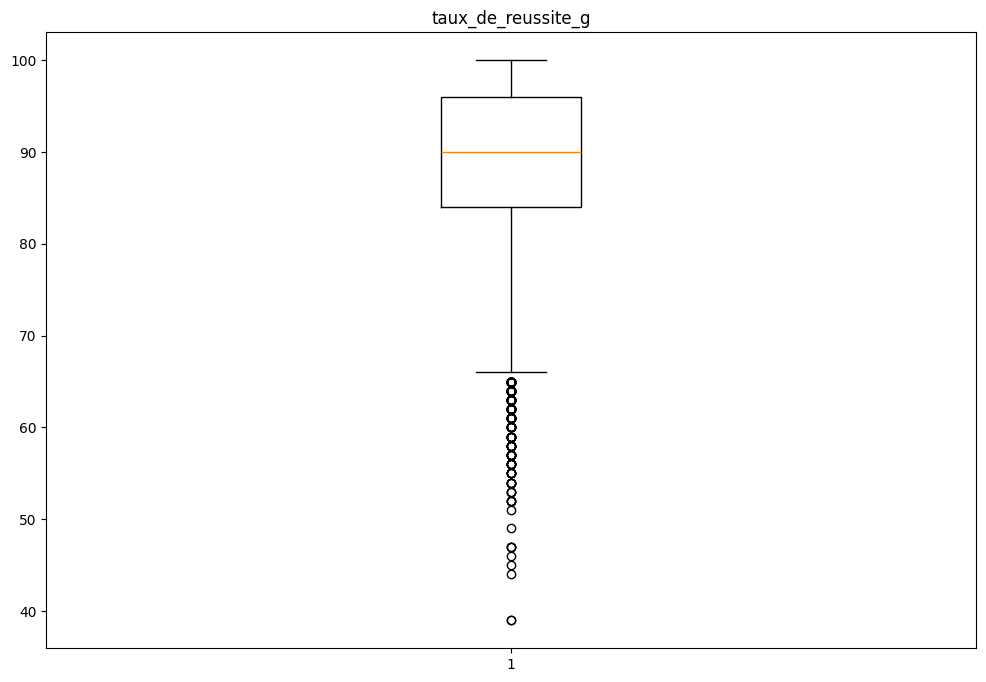

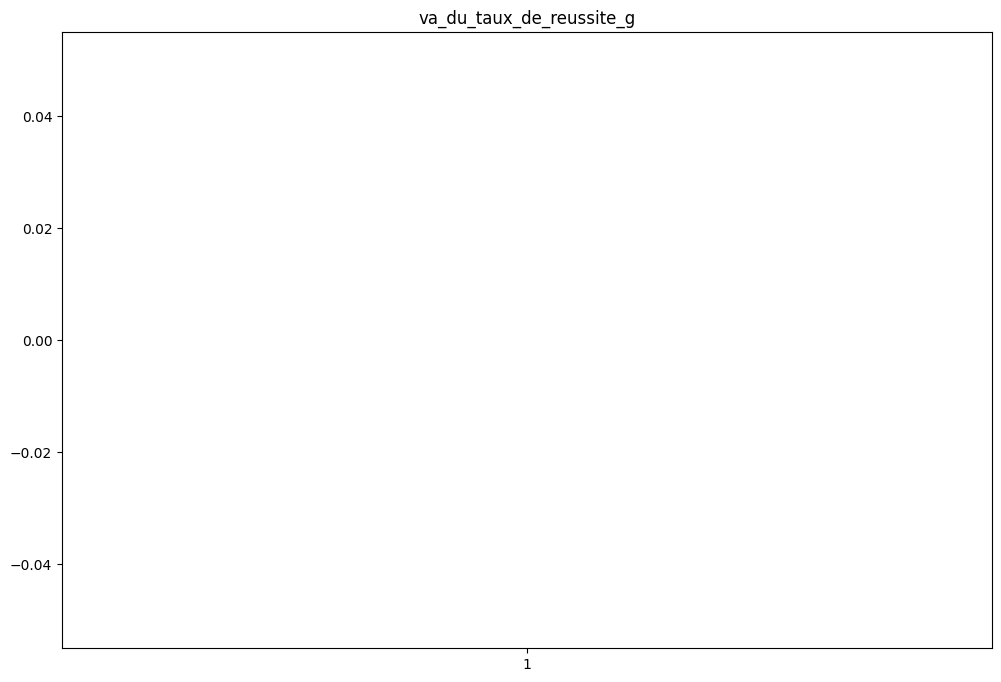

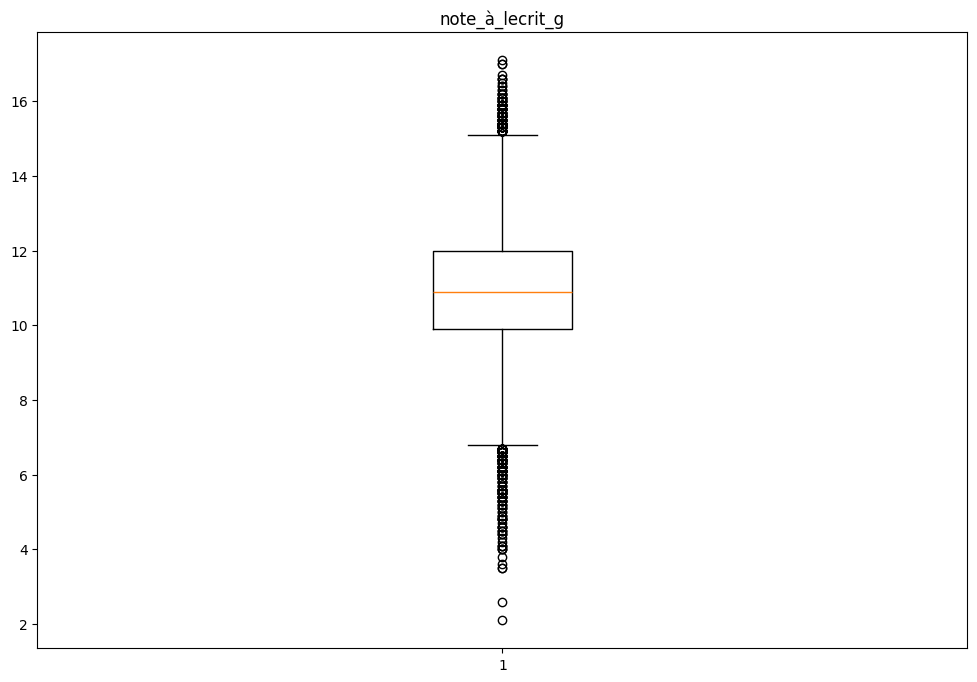

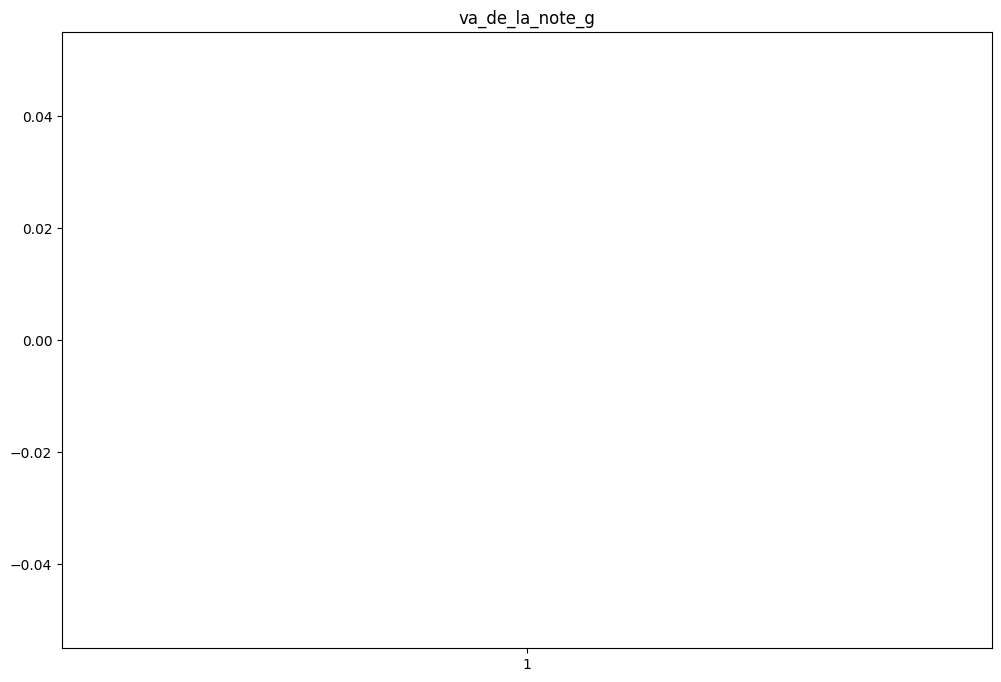

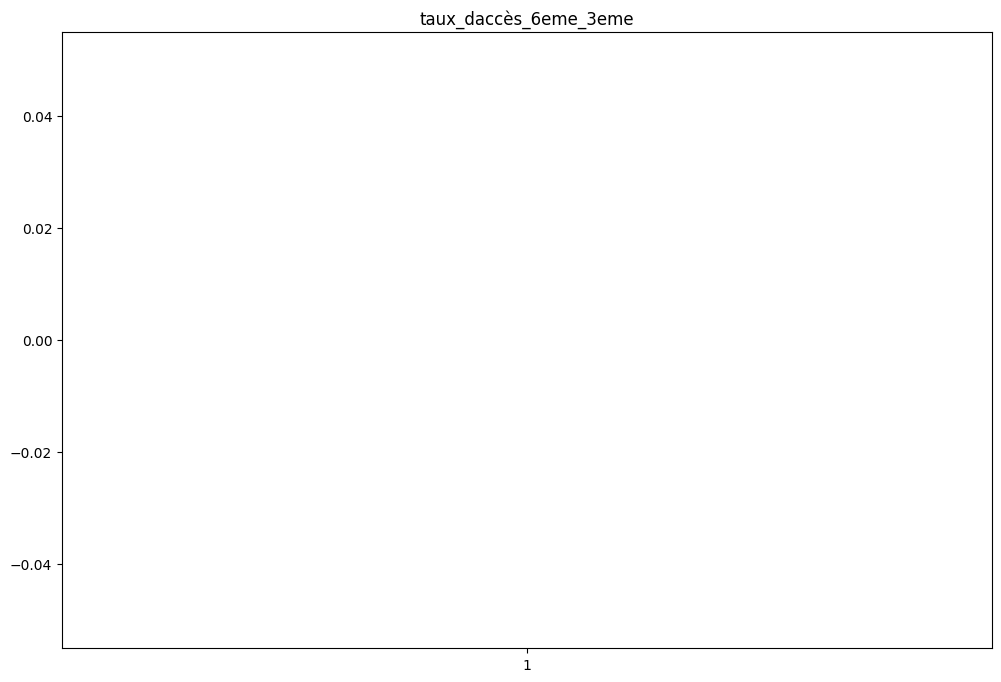

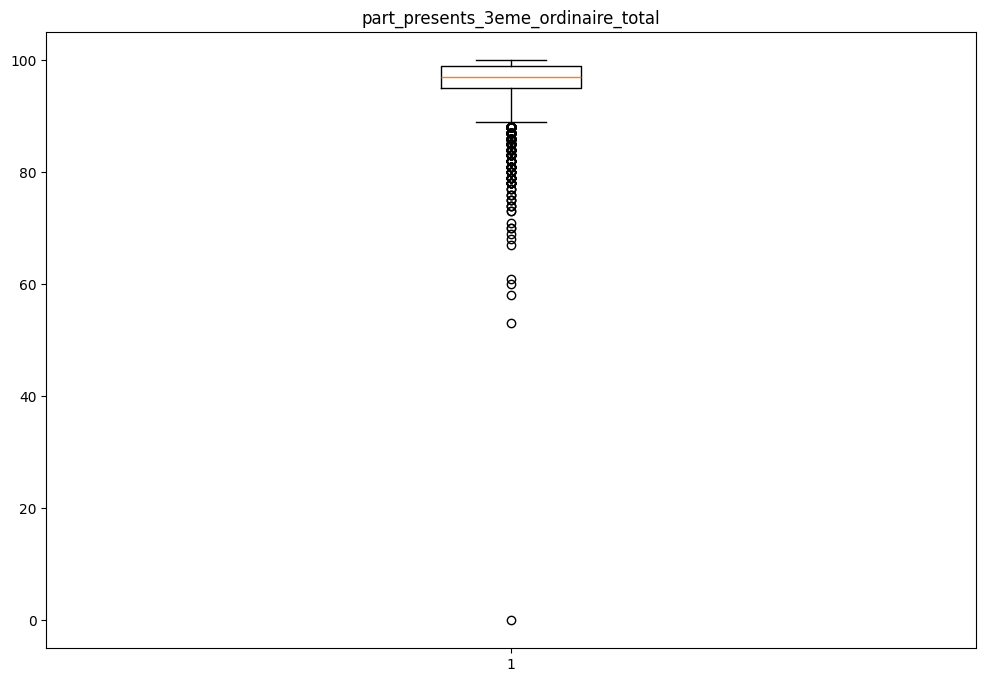

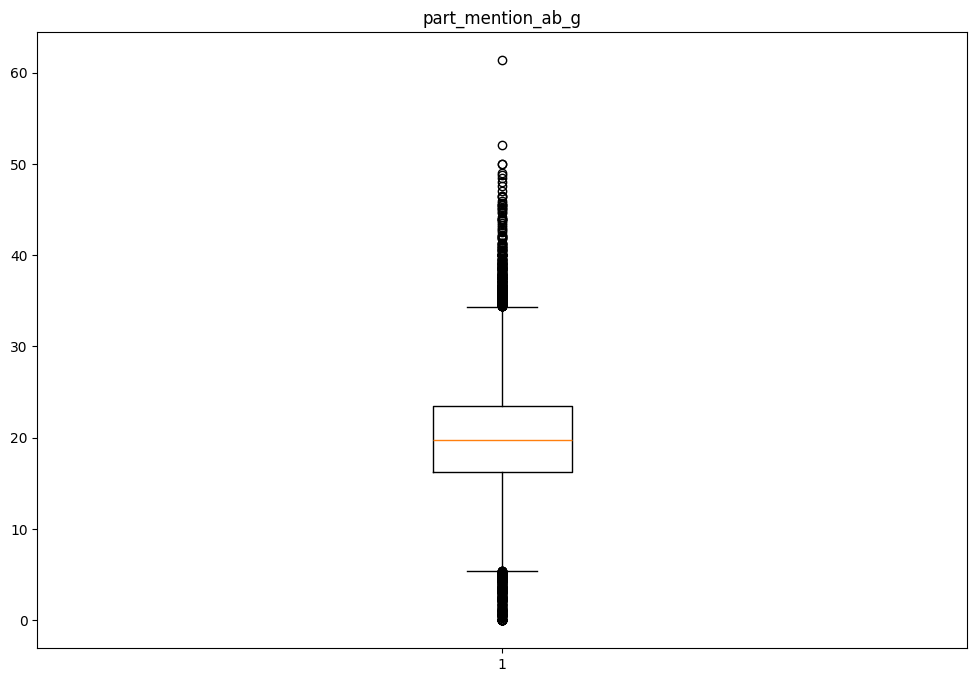

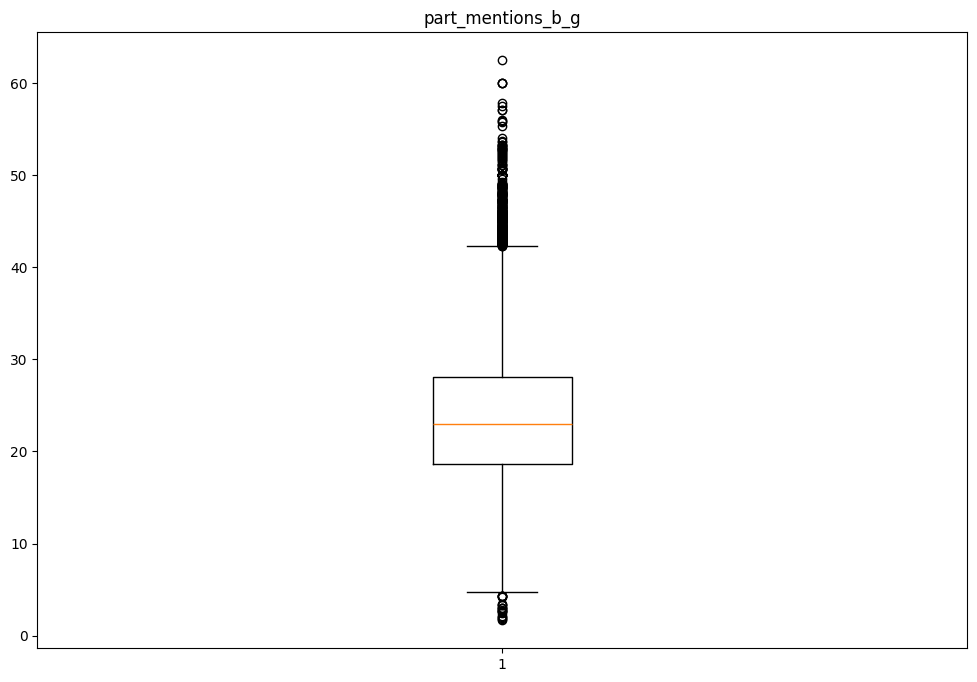

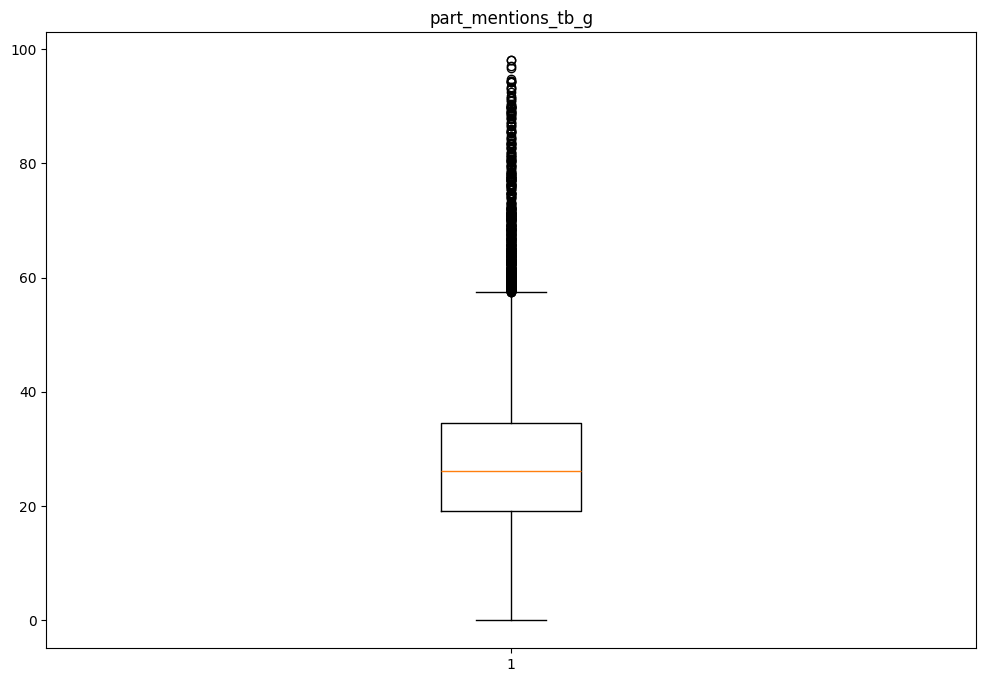

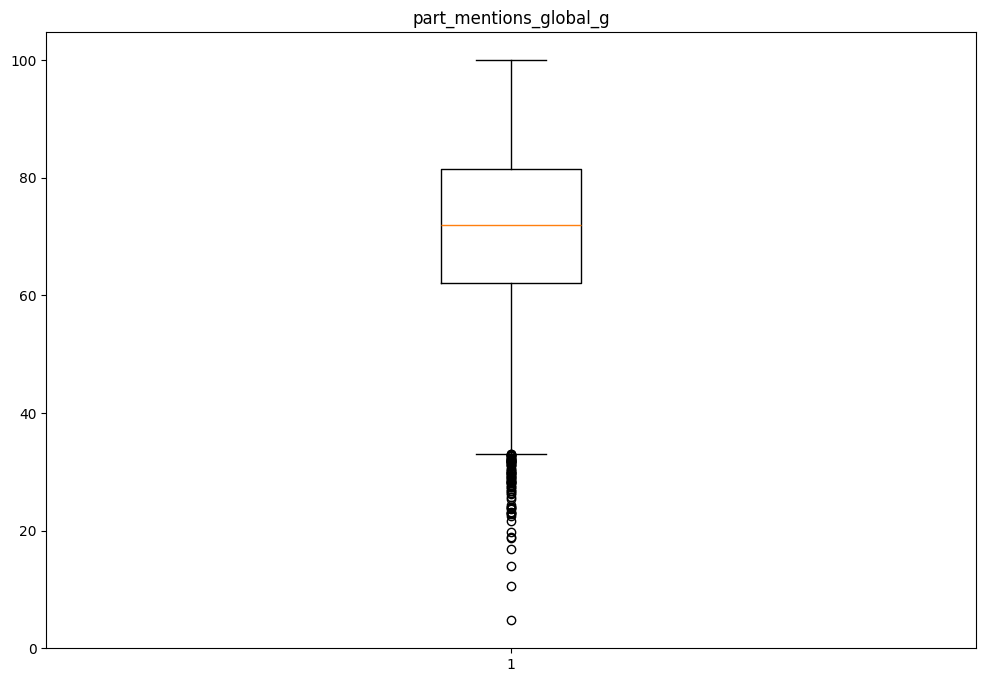

In [214]:
datas = ['taux_de_reussite_g', 'va_du_taux_de_reussite_g',
       'note_à_lecrit_g', 'va_de_la_note_g', 'taux_daccès_6eme_3eme',
       'part_presents_3eme_ordinaire_total', 'part_mention_ab_g',
       'part_mentions_b_g', 'part_mentions_tb_g', 'part_mentions_global_g']
for data in datas:
  plt.figure(figsize=(12, 8))
  plt.boxplot(ind_colleges_clean[data])
  plt.title(f'{data}')
  plt.show()

In [245]:
reg_ind_colleges.sample(5)

,nb_candidats_g,taux_de_reussite_g,note_à_lecrit_g,part_presents_3eme_ordinaire_total,part_mention_ab_g,part_mentions_b_g,part_mentions_tb_g,part_mentions_global_g,va_de_la_note_g,va_du_taux_de_reussite_g
region_academique,,,,,,,,,,
GUADELOUPE,15934,87.07,8.42,97.79,20.97,19.71,15.60,56.28,-0.95,5.53
MAYOTTE,18437,71.74,6.19,95.61,21.78,14.55,6.57,42.90,NaN,NaN
AUVERGNE-RHONE-ALPES,266920,89.54,11.28,96.60,20.46,25.31,29.06,74.83,-0.00,-1.94
MARTINIQUE,11915,90.68,8.82,98.03,22.78,20.04,17.24,60.06,-0.87,6.16
OCCITANIE,183600,89.33,11.20,95.98,20.20,24.56,28.75,73.51,0.02,-1.95


### Stacked Barplot des mentions (AB, B, TB)

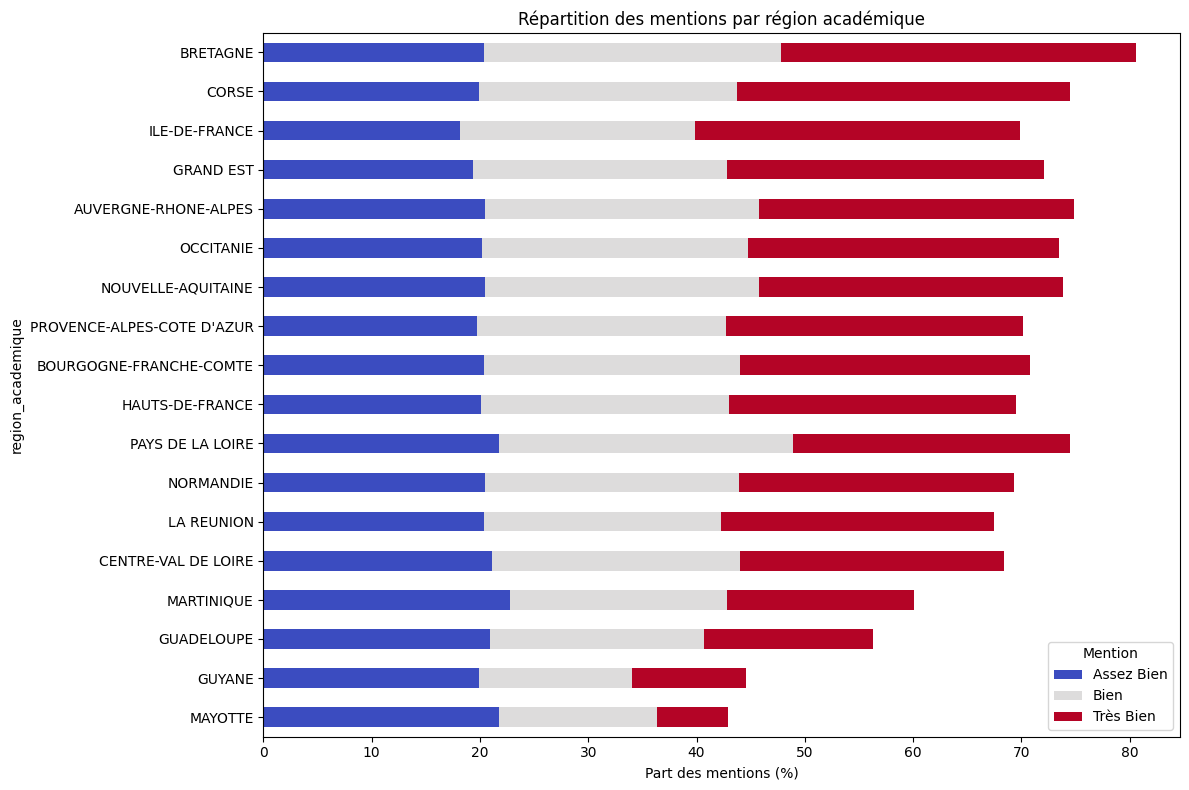

In [220]:
# Préparation
mentions_df = reg_ind_colleges[["part_mention_ab_g", "part_mentions_b_g", "part_mentions_tb_g"]].copy()
mentions_df["region_academique"] = reg_ind_colleges.index
mentions_df = mentions_df.sort_values(by="part_mentions_tb_g", ascending=True)

# Affichage
mentions_df.set_index("region_academique").plot(kind="barh",
                                                 stacked=True,
                                                 figsize=(12, 8),
                                                 colormap="coolwarm")
plt.xlabel("Part des mentions (%)")
plt.title("Répartition des mentions par région académique")
plt.legend(["Assez Bien", "Bien", "Très Bien"], title="Mention")
plt.tight_layout()
plt.show()

### Scatter plot note vs taux de réussite (corrélation)

In [247]:
import plotly.express as px

fig = px.scatter(reg_ind_colleges.reset_index(),
                 x="note_à_lecrit_g",
                 y="taux_de_reussite_g",
                 color="region_academique",
                 size="nb_candidats_g",
                 hover_name="region_academique",
                 title="Lien entre note moyenne à l'écrit et taux de réussite au brevet")
fig.update_layout(xaxis_title="Note moyenne à l'écrit",
                  yaxis_title="Taux de réussite (%)")
fig.show()

### Visualisation principale : Dashboard complet des résultats du brevet

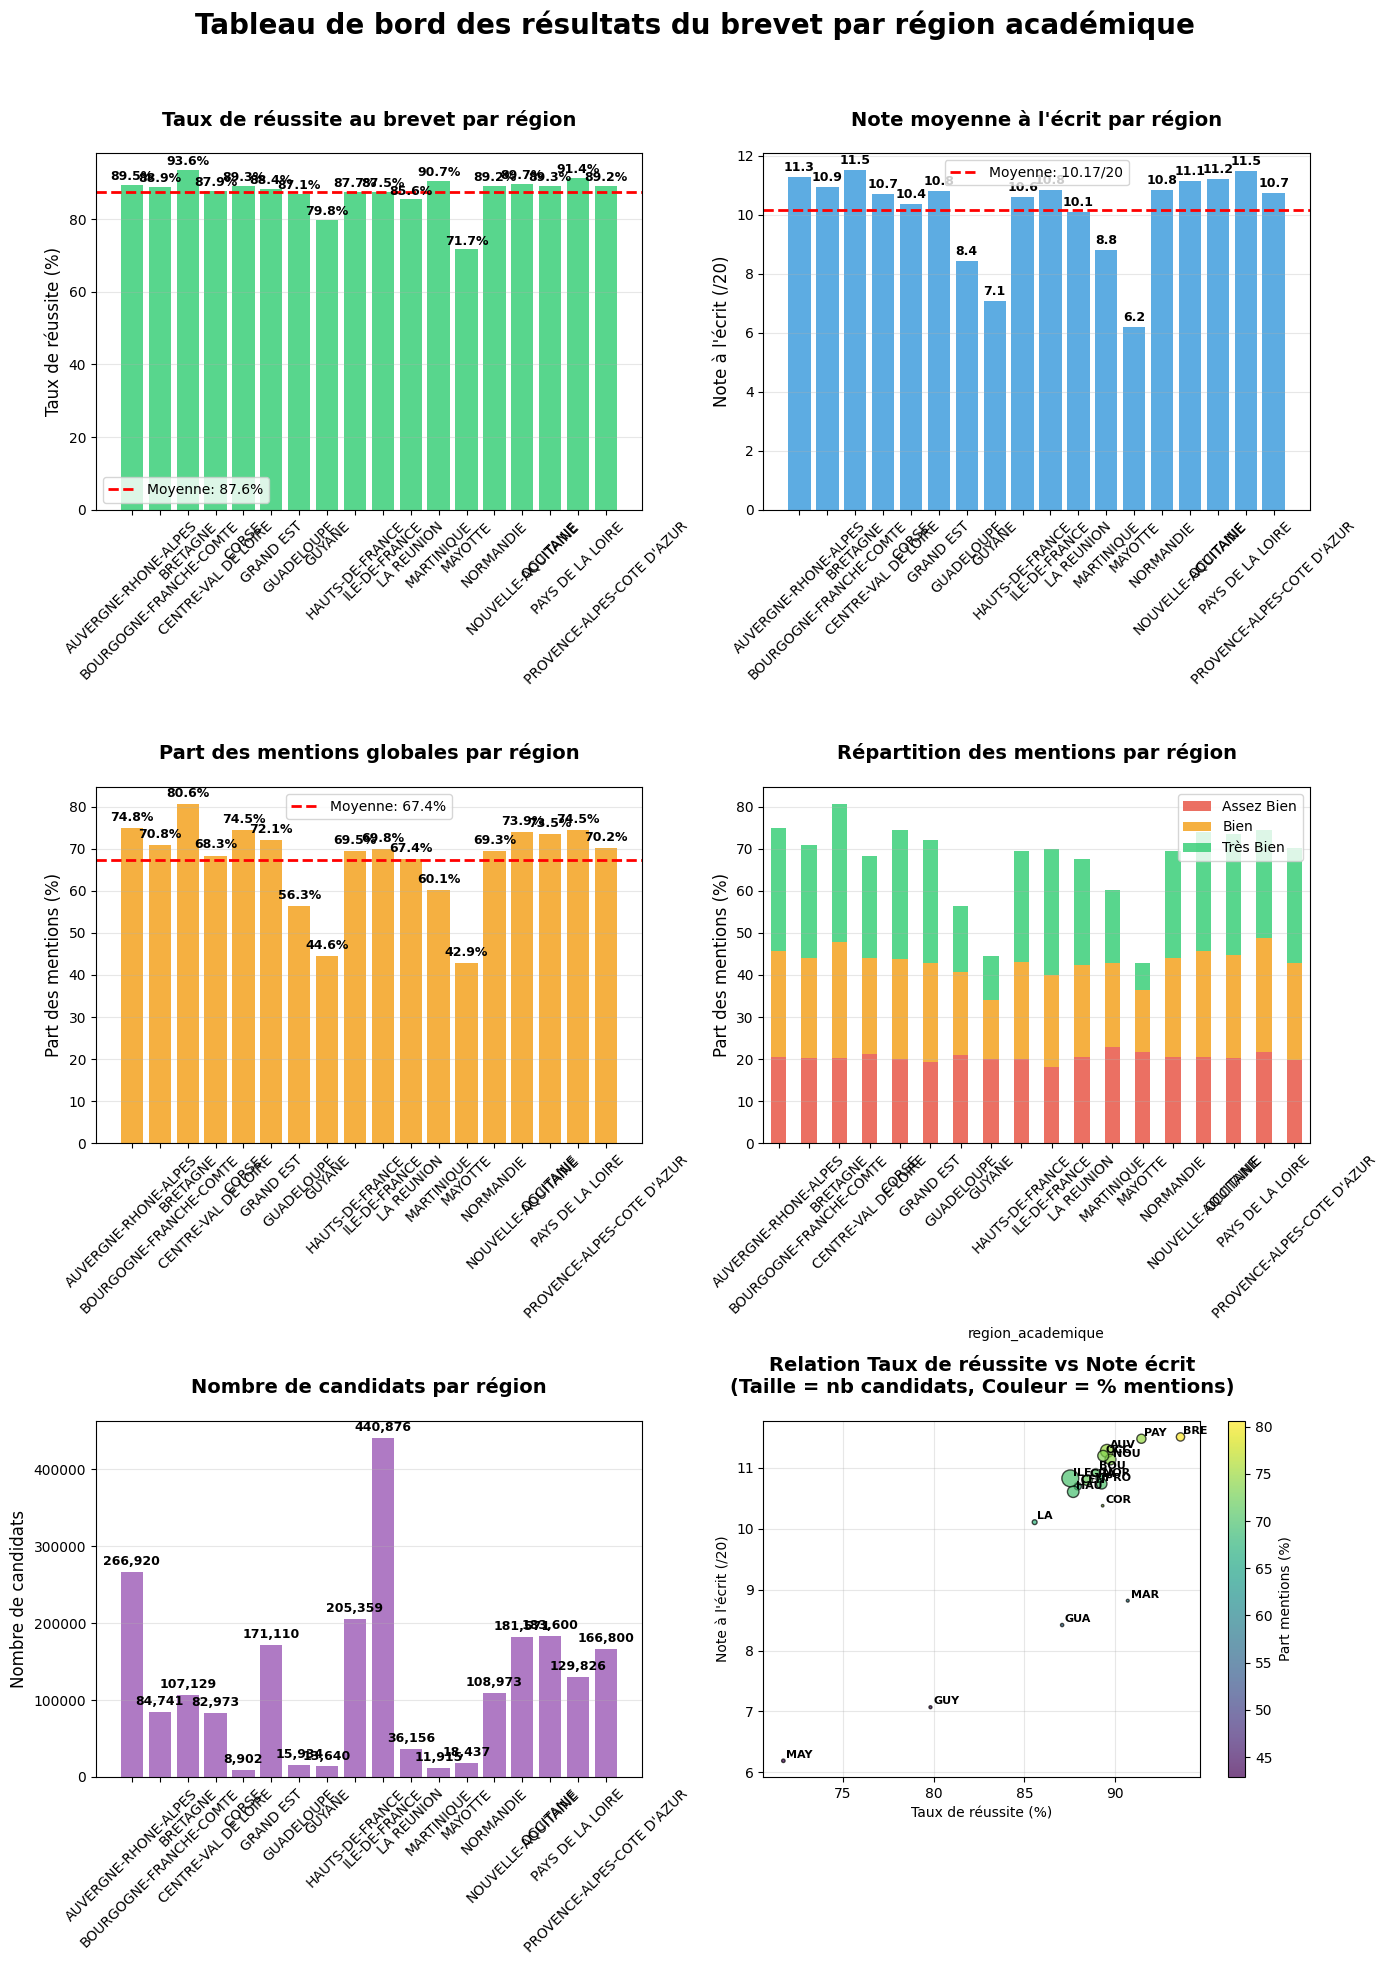

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Créer un dashboard avec 6 graphiques
fig, axes = plt.subplots(3, 2, figsize=(14, 20))
axes = axes.flatten()

# Graphique 1 : Taux de réussite par région
ax1 = axes[0]
bars1 = ax1.bar(reg_ind_colleges.index, reg_ind_colleges['taux_de_reussite_g'],
                color='#2ecc71', alpha=0.8)
ax1.set_title('Taux de réussite au brevet par région', fontsize=14, fontweight='bold', pad=20)
ax1.set_ylabel('Taux de réussite (%)', fontsize=12)
ax1.tick_params(axis='x', labelrotation=45, labelsize=10)
ax1.grid(axis='y', alpha=0.3)

# Ligne de référence (moyenne nationale)
moyenne_reussite = reg_ind_colleges['taux_de_reussite_g'].mean()
ax1.axhline(y=moyenne_reussite, color='red', linestyle='--', linewidth=2,
            label=f'Moyenne: {moyenne_reussite:.1f}%')
ax1.legend()

# Ajouter les valeurs sur les barres
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Graphique 2 : Note à l'écrit par région
ax2 = axes[1]
bars2 = ax2.bar(reg_ind_colleges.index, reg_ind_colleges['note_à_lecrit_g'],
                color='#3498db', alpha=0.8)
ax2.set_title('Note moyenne à l\'écrit par région', fontsize=14, fontweight='bold', pad=20)
ax2.set_ylabel('Note à l\'écrit (/20)', fontsize=12)
ax2.tick_params(axis='x', labelrotation=45, labelsize=10)
ax2.grid(axis='y', alpha=0.3)

moyenne_note = reg_ind_colleges['note_à_lecrit_g'].mean()
ax2.axhline(y=moyenne_note, color='red', linestyle='--', linewidth=2,
            label=f'Moyenne: {moyenne_note:.2f}/20')
ax2.legend()

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Graphique 3 : Mentions globales par région
ax3 = axes[2]
bars3 = ax3.bar(reg_ind_colleges.index, reg_ind_colleges['part_mentions_global_g'],
                color='#f39c12', alpha=0.8)
ax3.set_title('Part des mentions globales par région', fontsize=14, fontweight='bold', pad=20)
ax3.set_ylabel('Part des mentions (%)', fontsize=12)
ax3.tick_params(axis='x', labelrotation=45, labelsize=10)
ax3.grid(axis='y', alpha=0.3)

moyenne_mentions = reg_ind_colleges['part_mentions_global_g'].mean()
ax3.axhline(y=moyenne_mentions, color='red', linestyle='--', linewidth=2,
            label=f'Moyenne: {moyenne_mentions:.1f}%')
ax3.legend()

for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Graphique 4 : Répartition des types de mentions (stacked bar)
ax4 = axes[3]
mentions_data = reg_ind_colleges[['part_mention_ab_g', 'part_mentions_b_g', 'part_mentions_tb_g']]
mentions_data.plot(kind='bar', stacked=True, ax=ax4,
                   color=['#e74c3c', '#f39c12', '#2ecc71'], alpha=0.8)
ax4.set_title('Répartition des mentions par région', fontsize=14, fontweight='bold', pad=20)
ax4.set_ylabel('Part des mentions (%)', fontsize=12)
ax4.tick_params(axis='x', labelrotation=45, labelsize=10)
ax4.legend(['Assez Bien', 'Bien', 'Très Bien'], loc='upper right')
ax4.grid(axis='y', alpha=0.3)

# Graphique 5 : Nombre de candidats par région
ax5 = axes[4]
bars5 = ax5.bar(reg_ind_colleges.index, reg_ind_colleges['nb_candidats_g'],
                color='#9b59b6', alpha=0.8)
ax5.set_title('Nombre de candidats par région', fontsize=14, fontweight='bold', pad=20)
ax5.set_ylabel('Nombre de candidats', fontsize=12)
ax5.tick_params(axis='x', labelrotation=45, labelsize=10)
ax5.grid(axis='y', alpha=0.3)

for bar in bars5:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 5000,
             f'{height:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Graphique 6 : Correlation taux de réussite vs note à l'écrit
ax6 = axes[5]
scatter = ax6.scatter(reg_ind_colleges['taux_de_reussite_g'],
                     reg_ind_colleges['note_à_lecrit_g'],
                     s=reg_ind_colleges['nb_candidats_g']/3000,
                     c=reg_ind_colleges['part_mentions_global_g'],
                     cmap='viridis', alpha=0.7, edgecolors='black')

# Annotations des régions
for region, row in reg_ind_colleges.iterrows():
    ax6.annotate(region[:3], (row['taux_de_reussite_g'], row['note_à_lecrit_g']),
                xytext=(2, 2), textcoords='offset points',
                fontsize=8, fontweight='bold')

ax6.set_title('Relation Taux de réussite vs Note écrit\n(Taille = nb candidats, Couleur = % mentions)',
              fontsize=14, fontweight='bold', pad=20)
ax6.set_xlabel('Taux de réussite (%)')
ax6.set_ylabel('Note à l\'écrit (/20)')
ax6.grid(True, alpha=0.3)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax6)
cbar.set_label('Part mentions (%)', fontsize=10)

plt.suptitle('Tableau de bord des résultats du brevet par région académique',
             fontsize=20, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Analyse des performances : Top/Flop par indicateur

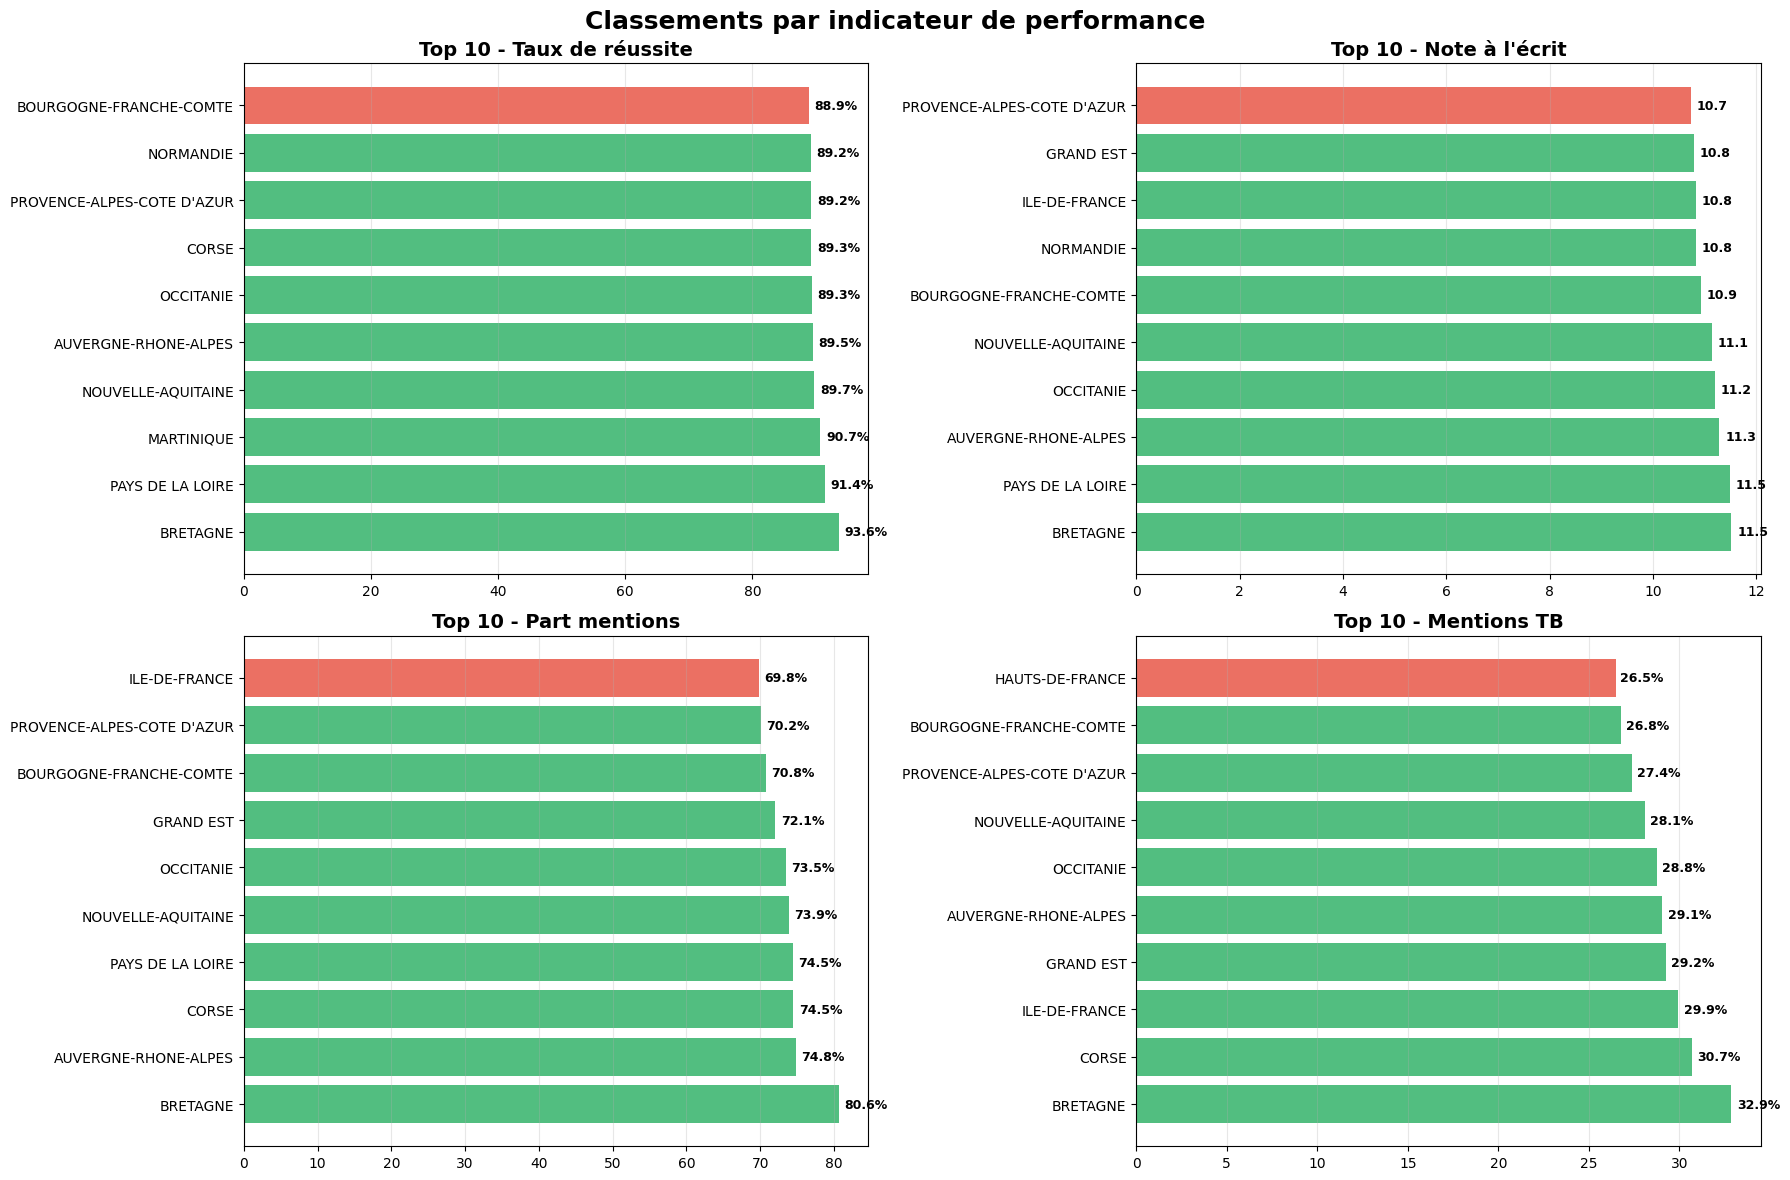

In [225]:
# Créer des rankings pour chaque indicateur
indicateurs = {
    'Taux de réussite': 'taux_de_reussite_g',
    'Note à l\'écrit': 'note_à_lecrit_g',
    'Part mentions': 'part_mentions_global_g',
    'Mentions TB': 'part_mentions_tb_g'
}

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for i, (titre, colonne) in enumerate(indicateurs.items()):
    ax = axes[i]

    # Trier par performance décroissante
    data_sorted = reg_ind_colleges.sort_values(colonne, ascending=False)

    # Top 10 et Bottom 5
    top_regions = data_sorted.head(10)

    # Couleurs différentes pour top/bottom
    colors = ['#27ae60' if x >= data_sorted[colonne].median() else '#e74c3c'
              for x in top_regions[colonne]]

    bars = ax.barh(range(len(top_regions)), top_regions[colonne],
                   color=colors, alpha=0.8)

    ax.set_yticks(range(len(top_regions)))
    ax.set_yticklabels(top_regions.index, fontsize=10)
    ax.set_title(f'Top 10 - {titre}', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)

    # Ajouter les valeurs
    for j, (bar, val) in enumerate(zip(bars, top_regions[colonne])):
        ax.text(val + val*0.01, bar.get_y() + bar.get_height()/2,
                f'{val:.1f}{"%" if "taux" in colonne or "part" in colonne else ""}',
                va='center', fontweight='bold', fontsize=9)

plt.suptitle('Classements par indicateur de performance',
             fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

### Analyse des inégalités territoriales

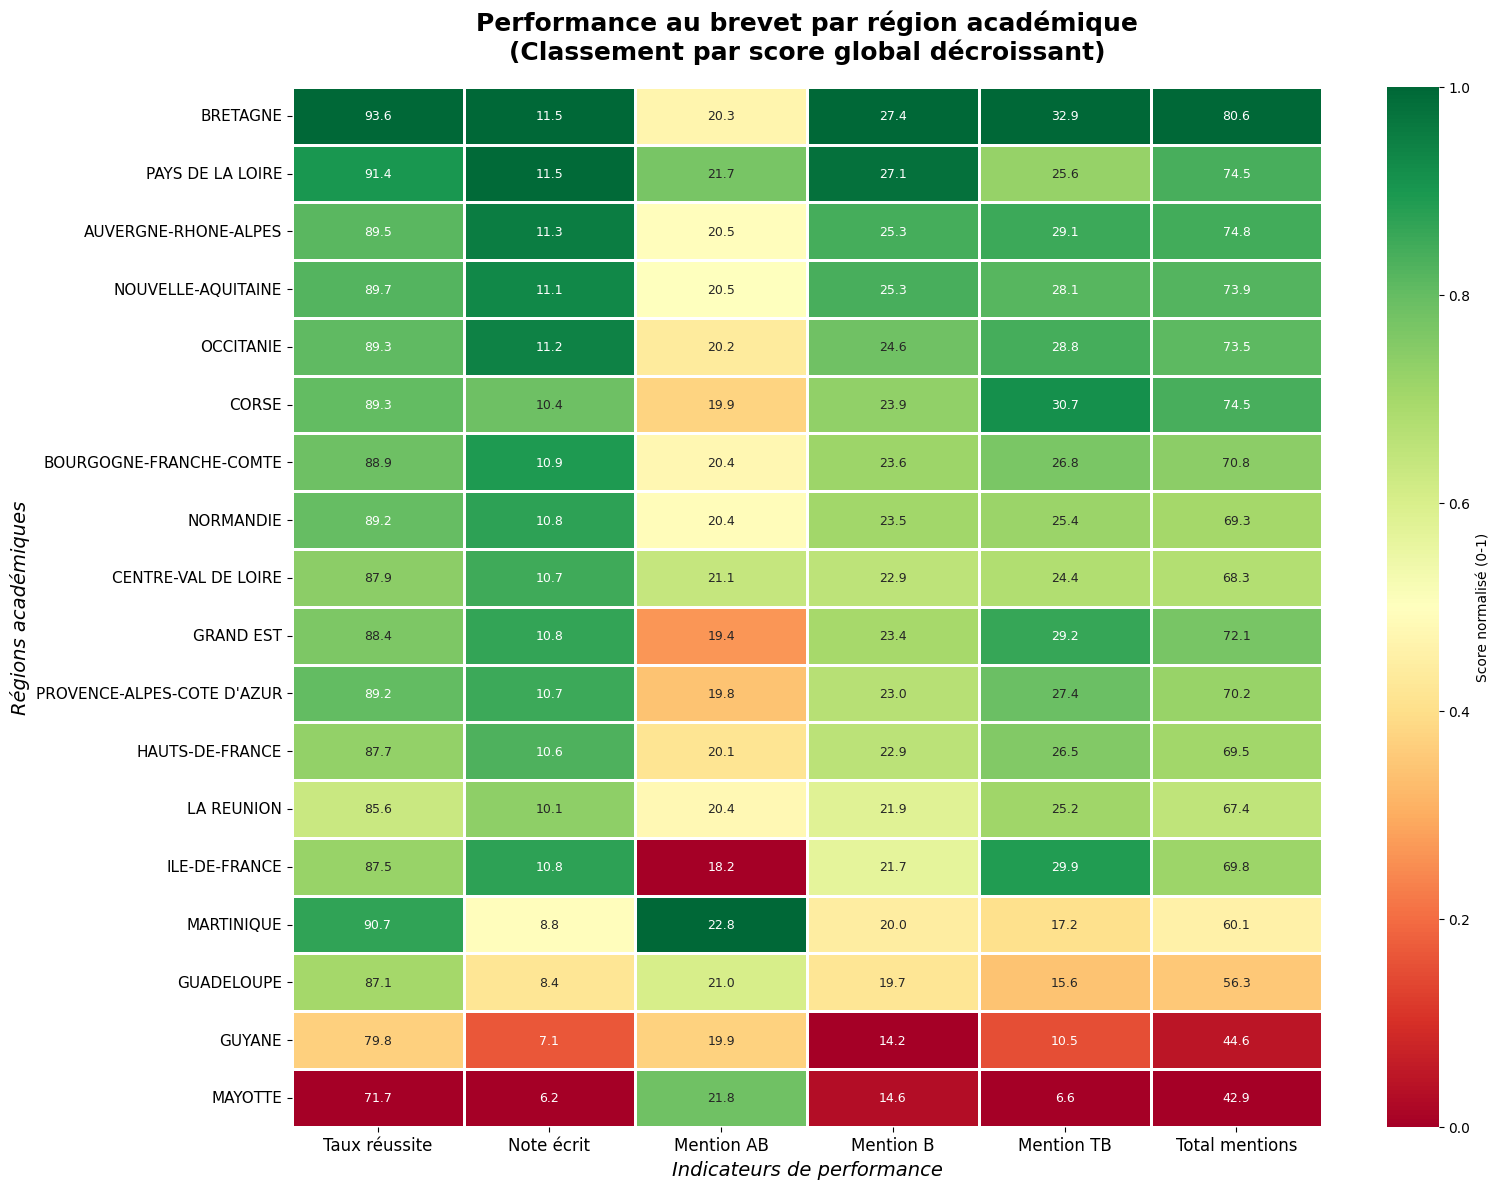

🏆 CLASSEMENT GLOBAL DES RÉGIONS
🥇 BRETAGNE                       Score: 0.911
🥈 PAYS DE LA LOIRE               Score: 0.868
🥉 AUVERGNE-RHONE-ALPES           Score: 0.801
 4. NOUVELLE-AQUITAINE             Score: 0.789
 5. OCCITANIE                      Score: 0.771
 6. CORSE                          Score: 0.742
 7. BOURGOGNE-FRANCHE-COMTE        Score: 0.729
 8. NORMANDIE                      Score: 0.713
 9. CENTRE-VAL DE LOIRE            Score: 0.706
10. GRAND EST                      Score: 0.704
11. PROVENCE-ALPES-COTE D'AZUR     Score: 0.696
12. HAUTS-DE-FRANCE                Score: 0.683
13. LA REUNION                     Score: 0.631
14. ILE-DE-FRANCE                  Score: 0.628
15. MARTINIQUE                     Score: 0.611
16. GUADELOUPE                     Score: 0.474
17. GUYANE                         Score: 0.184
18. MAYOTTE                        Score: 0.135


In [241]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Copie pour ne pas toucher aux données originales
df_perf = reg_ind_colleges.copy()

# On retire nb_candidats_g et part_presents_3eme_ordinaire_total
df_perf = df_perf.drop(columns=["nb_candidats_g", "part_presents_3eme_ordinaire_total"])

# Normalisation des indicateurs (0 à 1 pour comparabilité)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_perf),
                         index=df_perf.index,
                         columns=df_perf.columns)

# Renommer les colonnes pour plus de lisibilité
df_scaled_renamed = df_scaled.rename(columns={
    'taux_de_reussite_g': 'Taux réussite',
    'note_à_lecrit_g': 'Note écrit',
    'part_mention_ab_g': 'Mention AB',
    'part_mentions_b_g': 'Mention B',
    'part_mentions_tb_g': 'Mention TB',
    'part_mentions_global_g': 'Total mentions'
})

# 🎯 CORRECTION : Calculer le score global et trier correctement
df_scaled_renamed['Score_global'] = df_scaled_renamed.mean(axis=1)

# Trier par score global décroissant
df_final = df_scaled_renamed.sort_values('Score_global', ascending=False)

# Supprimer la colonne Score_global pour la heatmap
df_final_for_heatmap = df_final.drop('Score_global', axis=1)

plt.figure(figsize=(16, 12))

# Créer une matrice d'annotations avec les valeurs originales
# Réordonner df_perf selon le même ordre que df_final
df_perf_ordered = df_perf.reindex(df_final.index)
df_perf_renamed = df_perf_ordered.rename(columns=colonnes_renommees)

sns.heatmap(df_final_for_heatmap,
            cmap="RdYlGn",
            linewidths=0.8,
            annot=df_perf_renamed.values,  # Valeurs réelles
            fmt=".1f",
            cbar_kws={'label': 'Score normalisé (0-1)'},
            square=False,
            annot_kws={'size': 9})

plt.title("Performance au brevet par région académique\n(Classement par score global décroissant)",
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Indicateurs de performance", fontsize=14, style='italic')
plt.ylabel("Régions académiques", fontsize=14, style='italic')
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()

# TABLEAU DE SCORES GLOBAUX
print("🏆 CLASSEMENT GLOBAL DES RÉGIONS")
print("="*45)
scores_globaux = df_final['Score_global'].sort_values(ascending=False)
for i, (region, score) in enumerate(scores_globaux.items(), 1):
    emoji = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else f"{i:2d}."
    print(f"{emoji} {region:<30} Score: {score:.3f}")

### Analyse complémentaire avec clustering

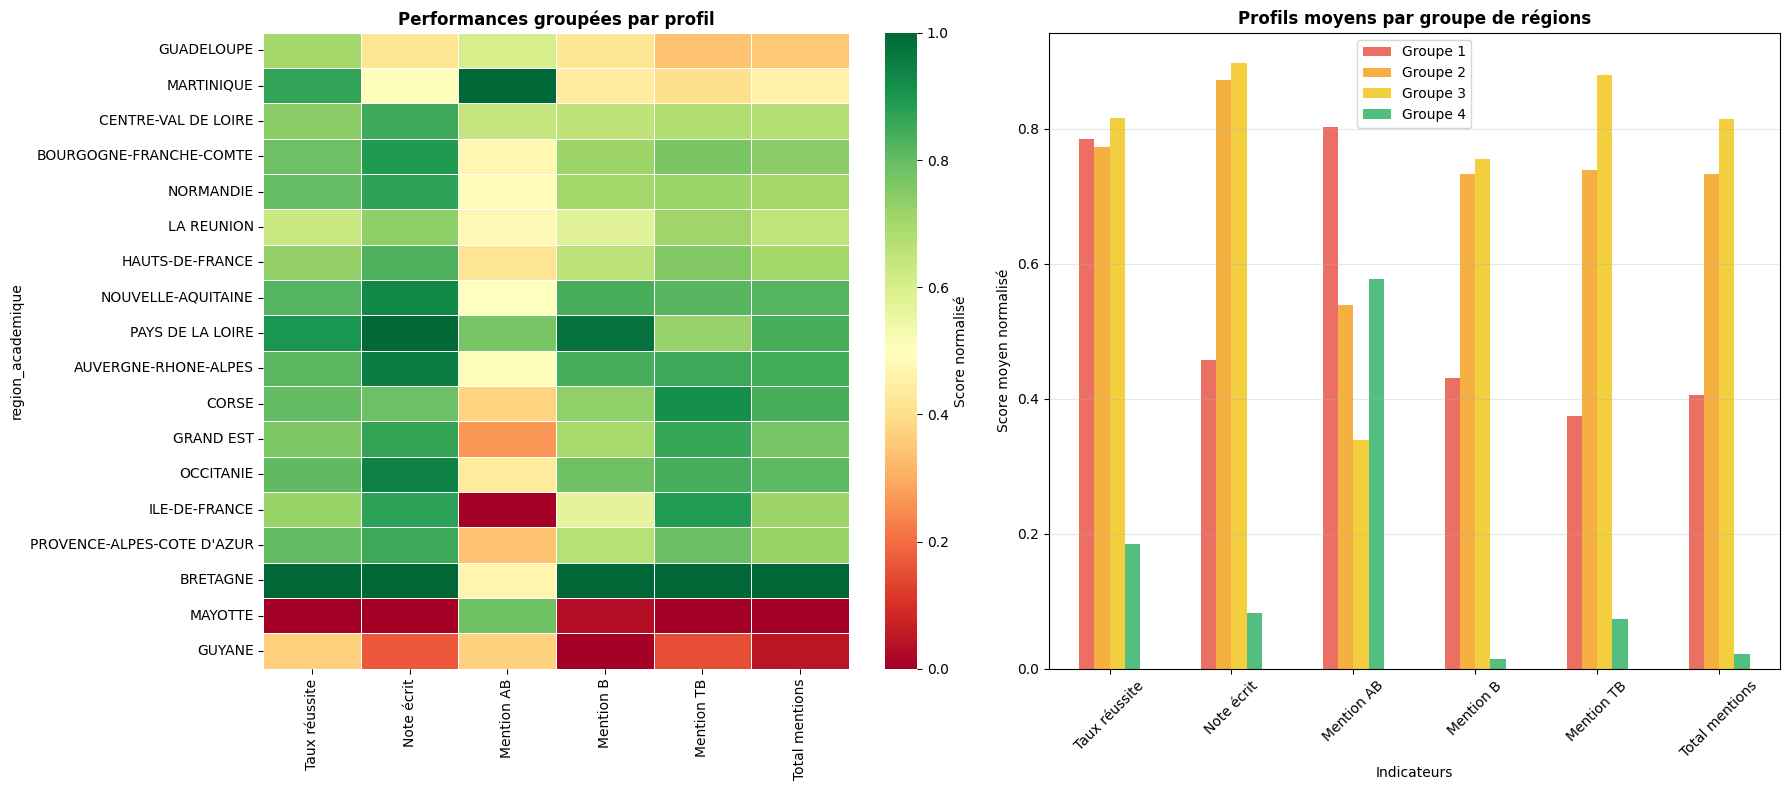


🎯 PROFILS DE RÉGIONS

📍 GROUPE 1 (2 régions):
   GUADELOUPE, MARTINIQUE

📍 GROUPE 2 (7 régions):
   BOURGOGNE-FRANCHE-COMTE, CENTRE-VAL DE LOIRE, HAUTS-DE-FRANCE, LA REUNION, NORMANDIE, NOUVELLE-AQUITAINE, PAYS DE LA LOIRE

📍 GROUPE 3 (7 régions):
   AUVERGNE-RHONE-ALPES, BRETAGNE, CORSE, GRAND EST, ILE-DE-FRANCE, OCCITANIE, PROVENCE-ALPES-COTE D'AZUR

📍 GROUPE 4 (2 régions):
   GUYANE, MAYOTTE


In [234]:
from sklearn.cluster import KMeans
import numpy as np

# Clustering des régions par profil de performance
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Ajouter les clusters au dataframe
df_with_clusters = df_scaled.copy()
df_with_clusters['Cluster'] = clusters

# Visualisation des clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Graphique 1 : Heatmap par cluster
cluster_colors = ['#e74c3c', '#f39c12', '#f1c40f', '#27ae60']
df_sorted_by_cluster = df_with_clusters.sort_values('Cluster')

# Créer une colormap pour les clusters
cluster_cmap = []
for cluster in df_sorted_by_cluster['Cluster']:
    cluster_cmap.append(cluster_colors[cluster])

# Heatmap sans la colonne cluster
data_for_heatmap = df_sorted_by_cluster.drop('Cluster', axis=1)
data_for_heatmap.columns = list(colonnes_renommees.values())

sns.heatmap(data_for_heatmap, ax=ax1,
            cmap="RdYlGn",
            linewidths=0.5,
            cbar_kws={'label': 'Score normalisé'})

ax1.set_title('Performances groupées par profil', fontweight='bold')

# Ajouter les couleurs de cluster sur le côté
for i, color in enumerate(cluster_cmap):
    ax1.add_patch(plt.Rectangle((-0.5, i), 0.3, 1,
                               facecolor=color, alpha=0.7))

# Graphique 2 : Profils moyens par cluster
cluster_profiles = df_scaled.groupby(clusters).mean()
cluster_profiles.columns = list(colonnes_renommees.values())

cluster_profiles.T.plot(kind='bar', ax=ax2,
                       color=cluster_colors[:n_clusters], alpha=0.8)
ax2.set_title('Profils moyens par groupe de régions', fontweight='bold')
ax2.set_xlabel('Indicateurs')
ax2.set_ylabel('Score moyen normalisé')
ax2.legend([f'Groupe {i+1}' for i in range(n_clusters)])
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Afficher les régions par cluster
print("\n🎯 PROFILS DE RÉGIONS")
print("="*30)
for i in range(n_clusters):
    regions_cluster = df_with_clusters[df_with_clusters['Cluster'] == i].index.tolist()
    print(f"\n📍 GROUPE {i+1} ({len(regions_cluster)} régions):")
    print(f"   {', '.join(regions_cluster)}")

### Analyse des écarts-types (stabilité des performances)

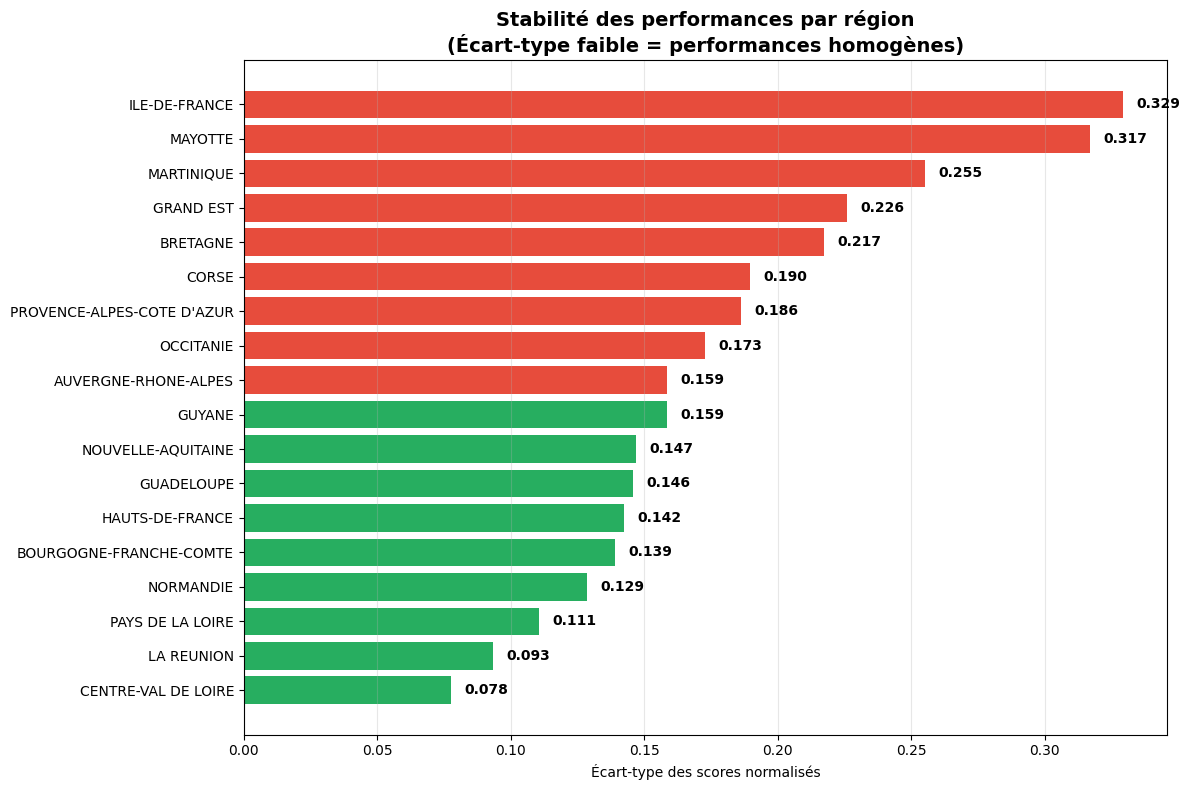

In [235]:
ecarts_types = df_scaled.std(axis=1).sort_values(ascending=True)

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(ecarts_types)), ecarts_types.values,
                color=['#27ae60' if x < ecarts_types.median() else '#e74c3c'
                       for x in ecarts_types.values])

plt.yticks(range(len(ecarts_types)), ecarts_types.index)
plt.title('Stabilité des performances par région\n(Écart-type faible = performances homogènes)',
          fontsize=14, fontweight='bold')
plt.xlabel('Écart-type des scores normalisés')
plt.grid(axis='x', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars, ecarts_types.values)):
    plt.text(val + 0.005, bar.get_y() + bar.get_height()/2,
             f'{val:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## Indicateurs lycées - ind_lycees_clean

In [437]:
df = ind_lycees_copy.copy()#.drop(columns=[col for col in ind_lycees_clean.columns if "valeur_ajoutee" in col])

In [440]:
# Colonne pourcentage de mention TB avec félicitation
df['part_de_mentions_tb_avec_félicitations'] = df['nombre_de_mentions_tb_avec_félicitations'] / df['effectif_de_term'] * 100
df['part_de_mentions_tb_avec_félicitations'] = df['part_de_mentions_tb_avec_félicitations'].round(2)
df.drop(columns='nombre_de_mentions_tb_avec_félicitations',inplace=True)

In [441]:
# Colonne pourcentage de mention TB sans félicitation
df['part_de_mentions_tb_sans_félicitations'] = df['nombre_de_mentions_tb_sans_félicitations'] / df['effectif_de_term'] * 100
df['part_de_mentions_tb_sans_félicitations'] = df['part_de_mentions_tb_sans_félicitations'].round(2)
df.drop(columns='nombre_de_mentions_tb_sans_félicitations',inplace=True)

In [442]:
# Colonne pourcentage de mention B
df['part_de_mentions_b'] = df['nombre_de_mentions_b'] / df['effectif_de_term'] * 100
df['part_de_mentions_b'] = df['part_de_mentions_b'].round(2)
df.drop(columns='nombre_de_mentions_b',inplace=True)

In [443]:
# Colonne pourcentage de mention AB
df['part_de_mentions_ab'] = df['nombre_de_mentions_ab'] / df['effectif_de_term'] * 100
df['part_de_mentions_ab'] = df['part_de_mentions_ab'].round(2)
df.drop(columns='nombre_de_mentions_ab',inplace=True)

In [444]:
df.sample(2)

,etablissement,annee,ville,uai,academie,departement,secteur,taux_de_reussite,taux_de_mentions,part_bacheliers_sortants_2de_1re_term,part_bacheliers_sortants_term,effectif_de_2de,effectif_de_1re,effectif_de_term,taux_d_acces_2nde_bac,taux_d_acces_1ere_bac,taux_d_acces_term_bac,region,departement,VA_du_taux_de_reussite,VA_du_taux_d_acces_2nde_bac,VA_du_taux_de_mentions,VA_du_taux_d_acces_1ere_bac,VA_du_taux_d_acces_term_bac,part_de_mentions_tb_avec_félicitations,part_de_mentions_tb_sans_félicitations,part_de_mentions_b,part_de_mentions_ab
3442,LYCEE FRANCOIS MAGENDIE,2019-01-01,BORDEAUX,0330026Z,BORDEAUX,GIRONDE,public,96.0,61.0,NaN,NaN,371.0,377.0,344.0,91.0,96.0,98.0,NOUVELLE-AQUITAINE,Gironde,-1.0,2.0,-10.0,1.0,0.0,NaN,NaN,NaN,NaN
22549,LYCEE MARCELIN BERTHELOT,2016-01-01,ST MAUR DES FOSSES,0940120V,CRETEIL,VAL-DE-MARNE,public,99.0,NaN,NaN,NaN,382.0,390.0,382.0,88.0,95.0,98.0,ILE-DE-FRANCE,Val-de-Marne,2.0,6.0,NaN,2.0,0.0,NaN,NaN,NaN,NaN


In [445]:
# Boxplot -- indicateurs
indicateurs = [
    'taux_de_reussite'
    ,'taux_de_mentions'
    ,'part_bacheliers_sortants_2de_1re_term'
    ,'part_bacheliers_sortants_term'
    ,'taux_d_acces_2nde_bac'
    ,'taux_d_acces_1ere_bac'
    ,'taux_d_acces_term_bac'
    ,'VA_du_taux_de_reussite'
    ,'VA_du_taux_d_acces_2nde_bac'
    ,'VA_du_taux_de_mentions'
    ,'VA_du_taux_d_acces_1ere_bac'
    ,'VA_du_taux_d_acces_term_bac'
    ,'part_de_mentions_tb_avec_félicitations'
    ,'part_de_mentions_tb_sans_félicitations'
    ,'part_de_mentions_b'
    ,'part_de_mentions_ab'
]

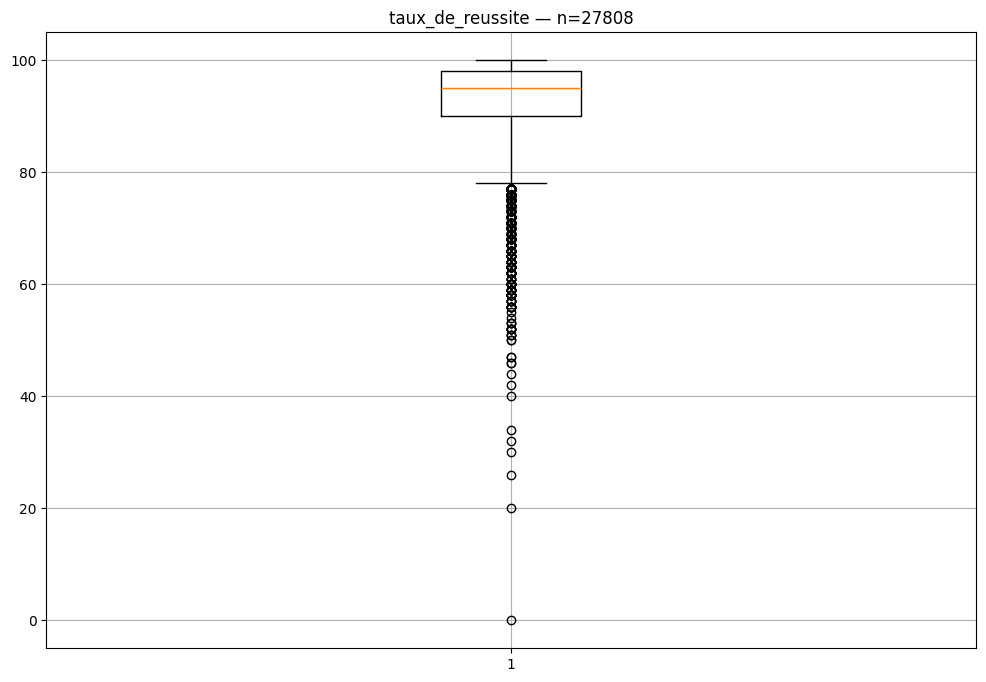

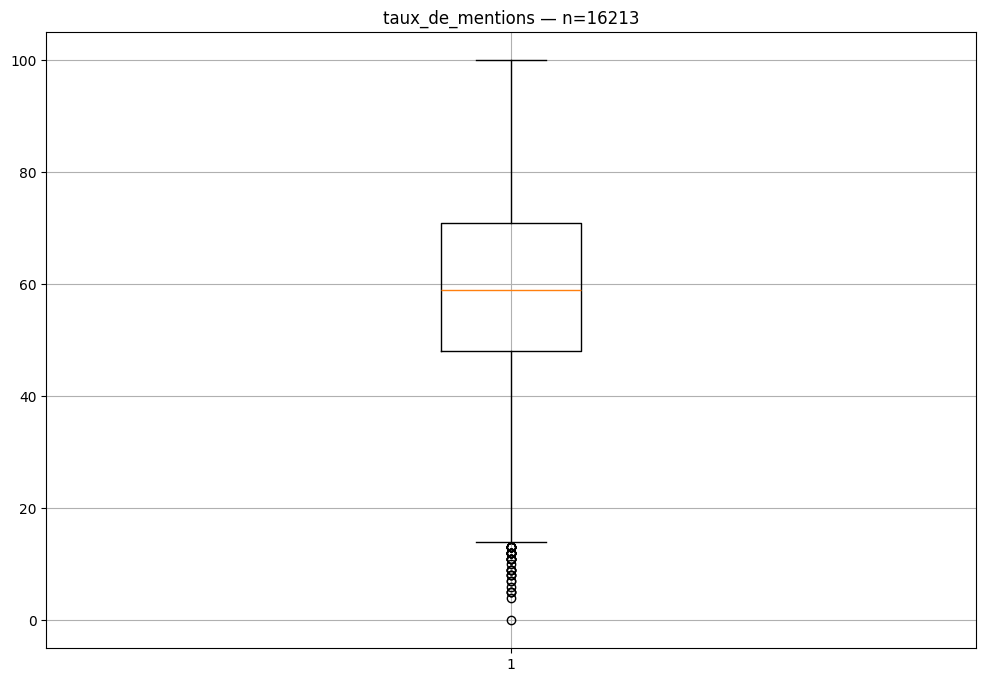

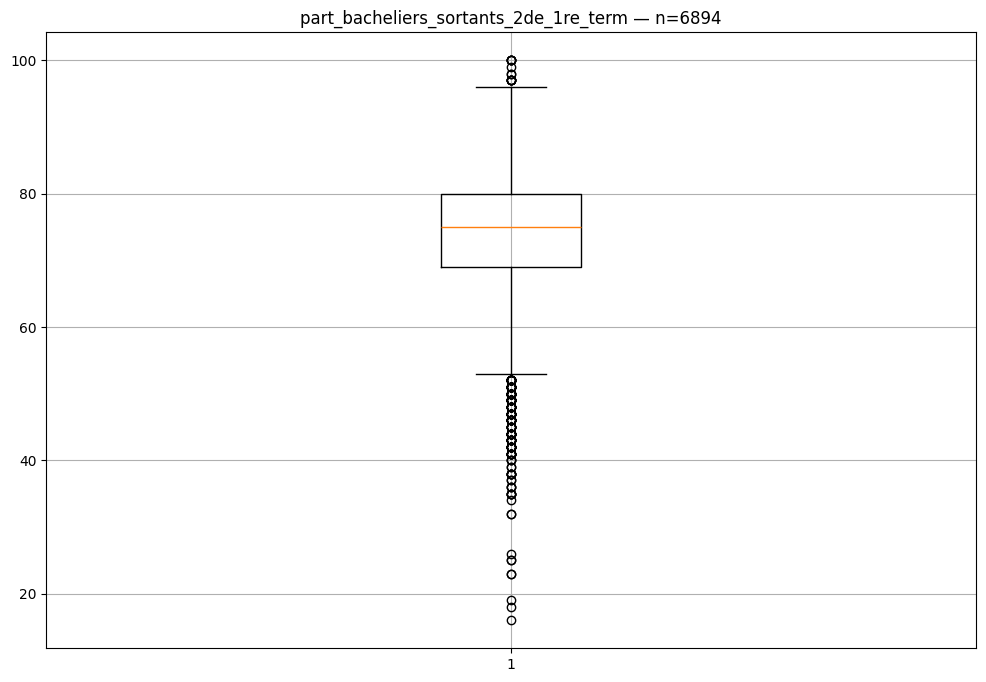

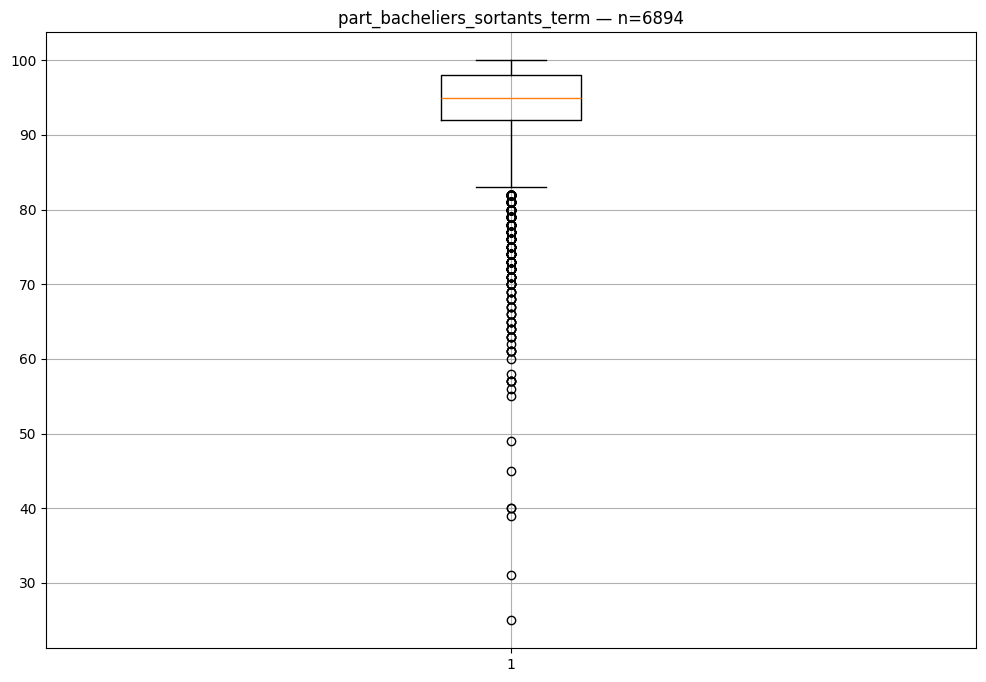

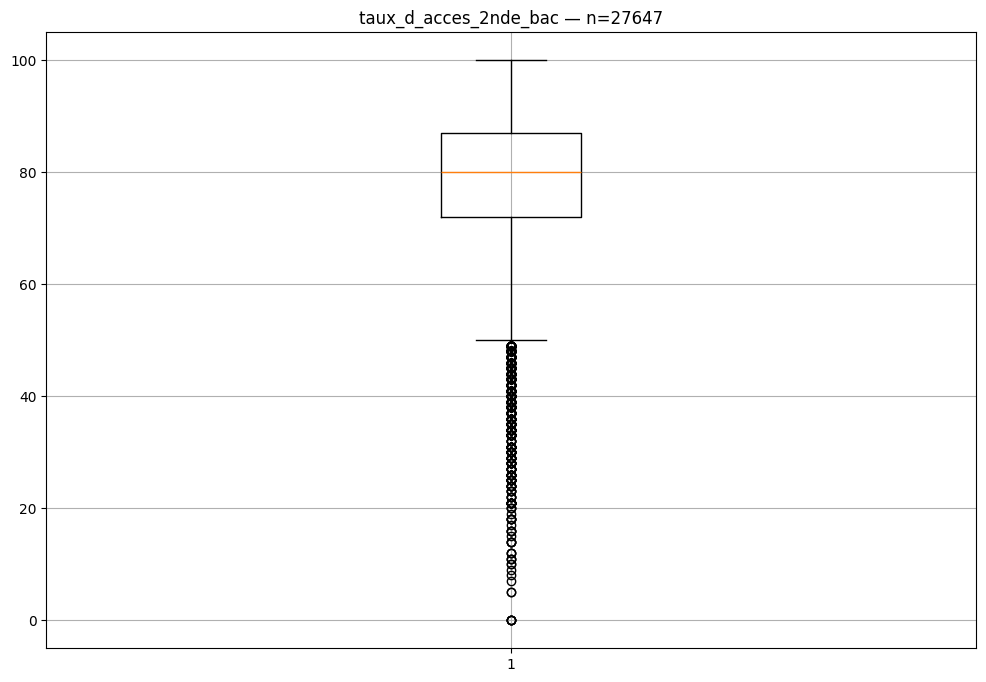

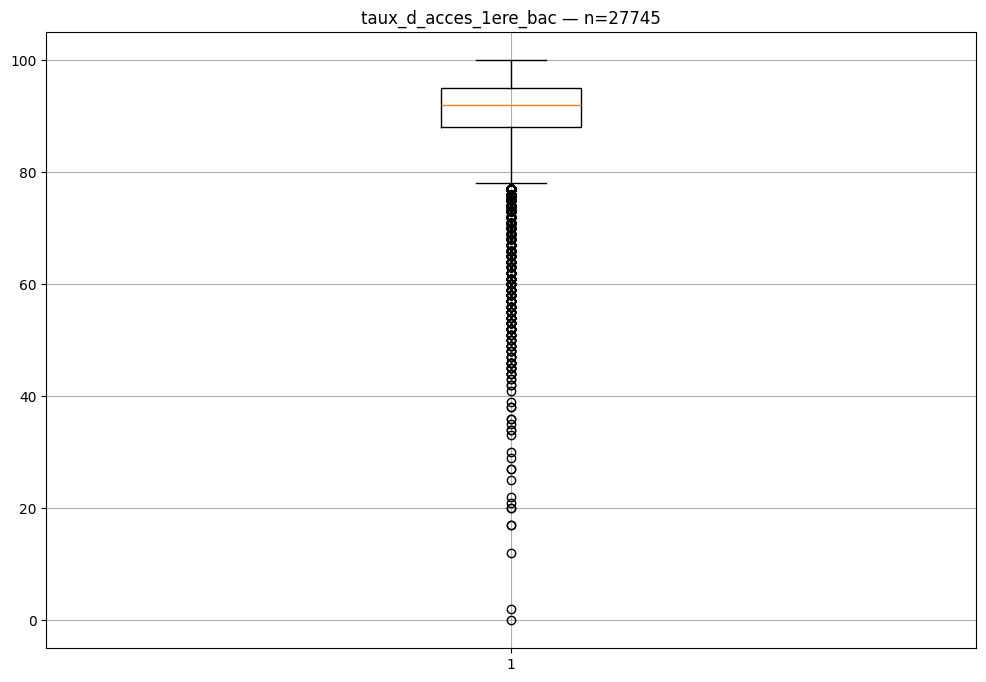

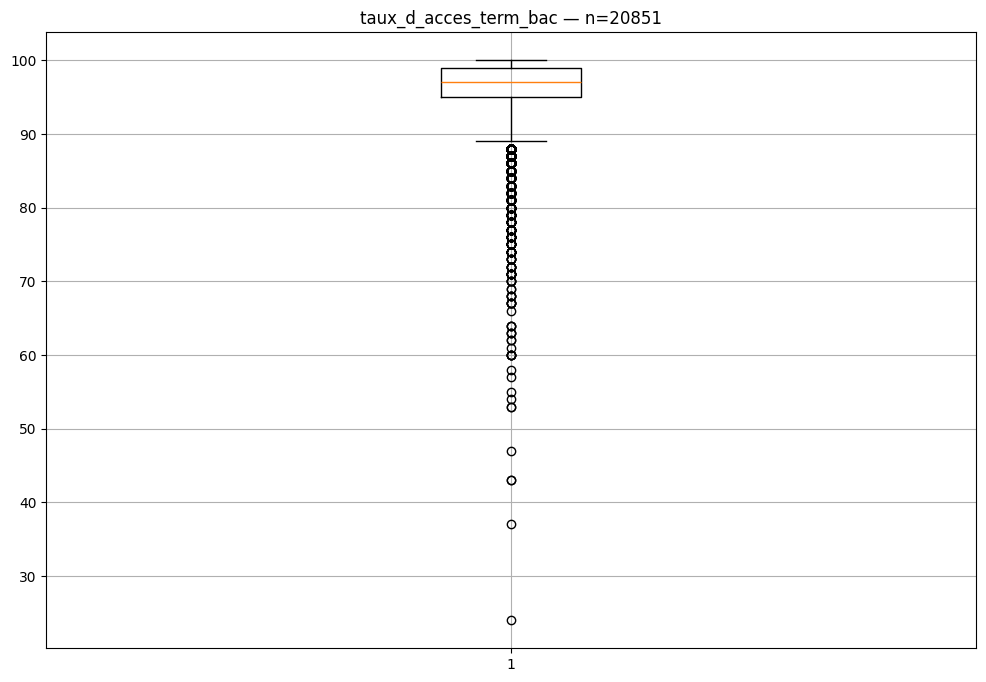

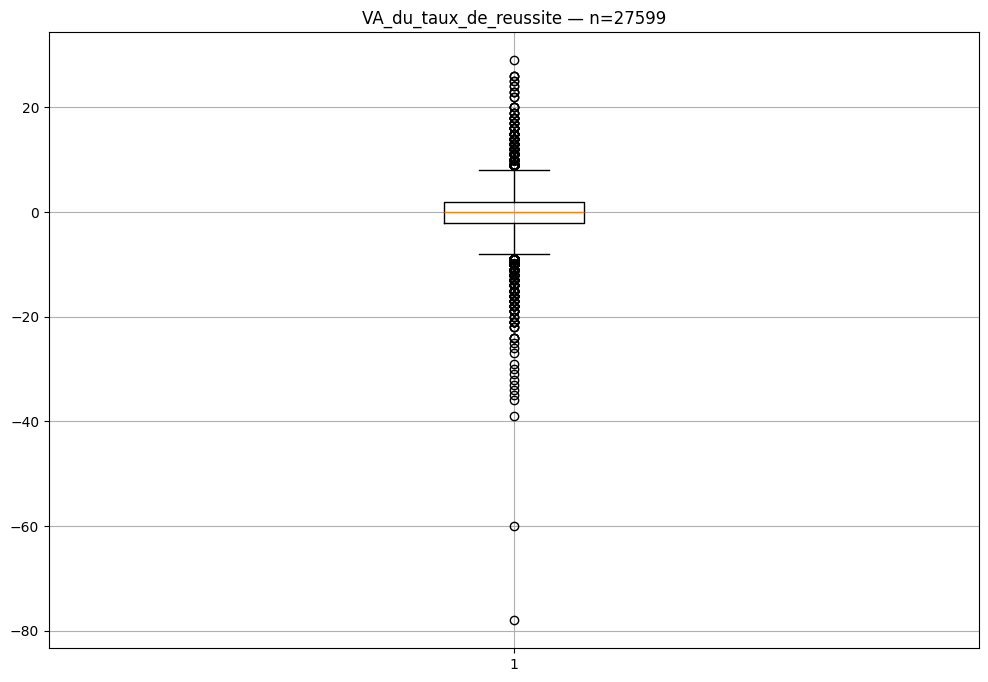

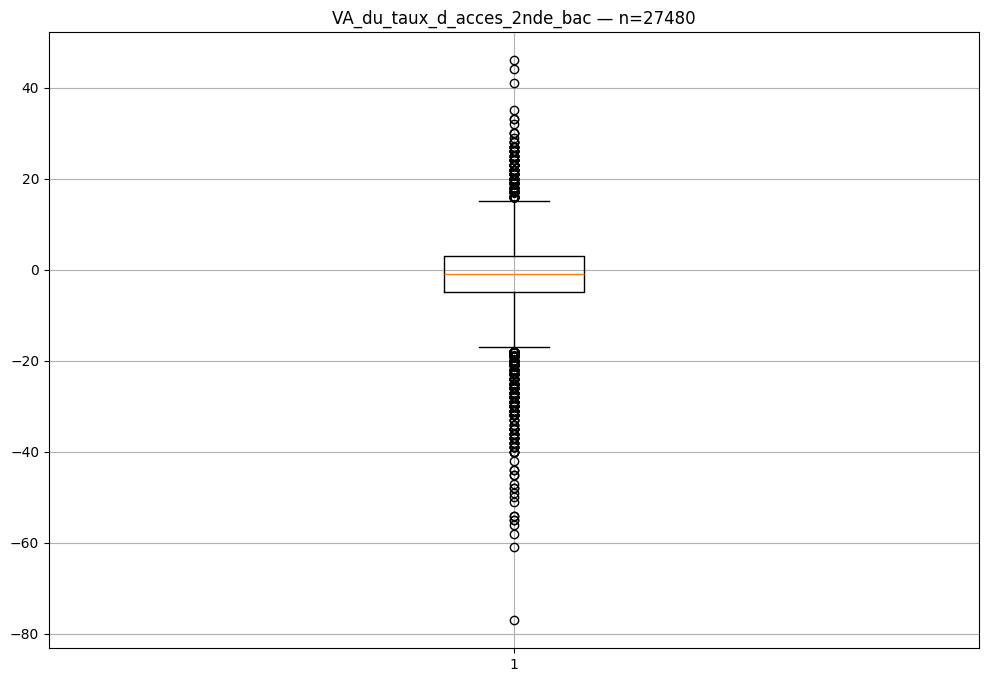

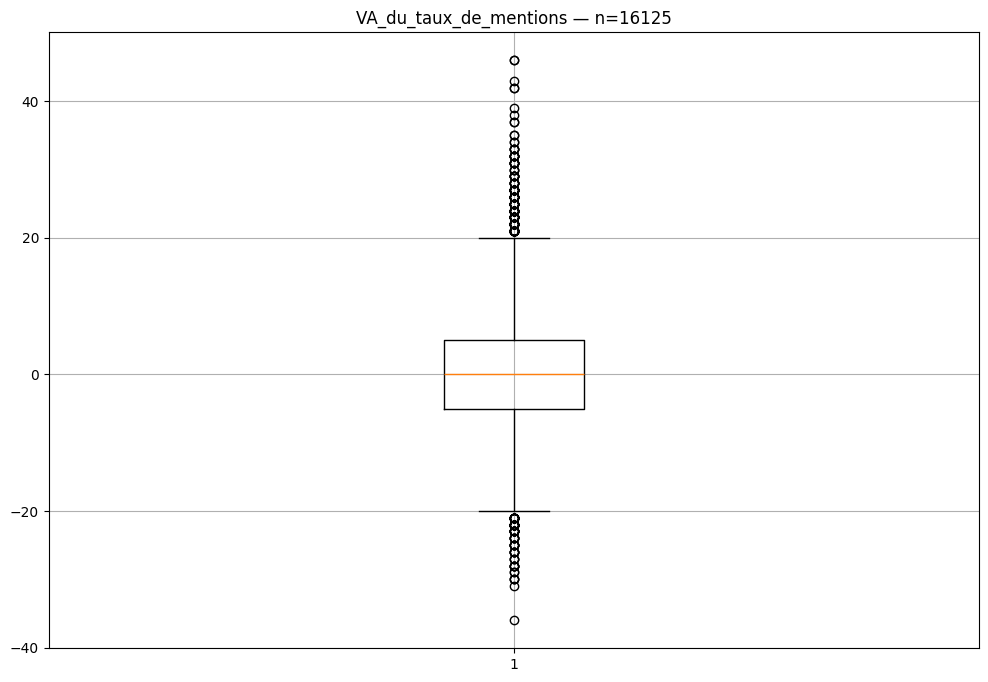

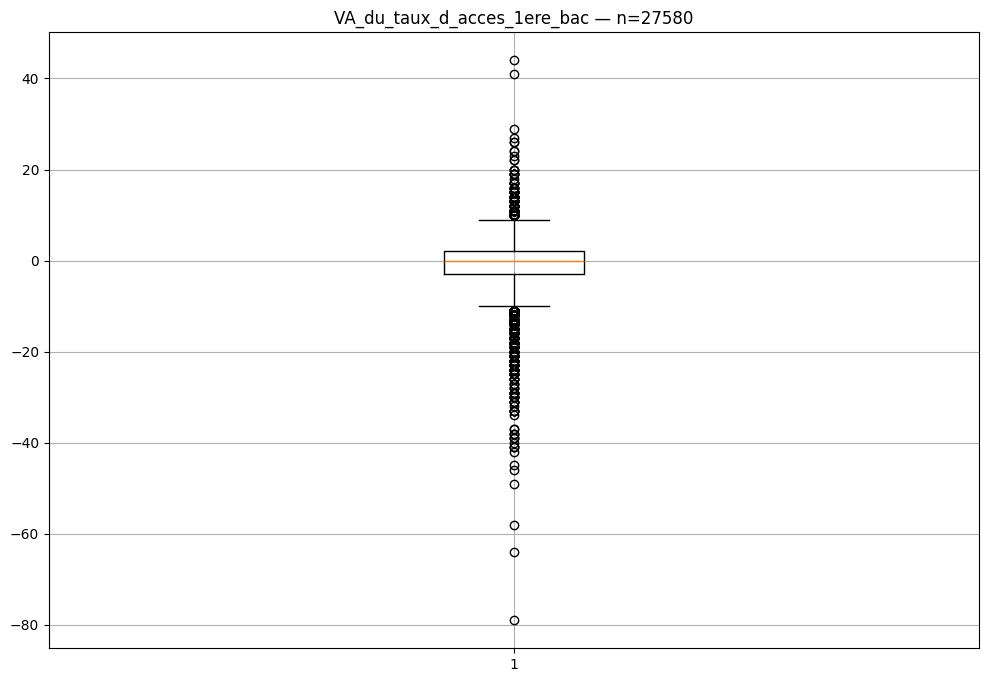

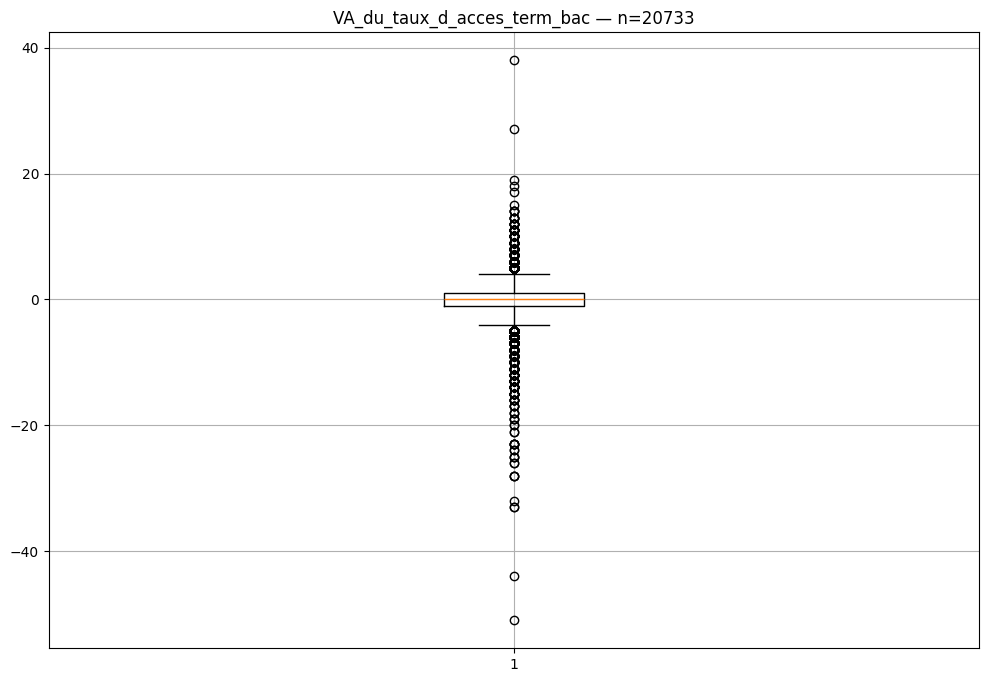

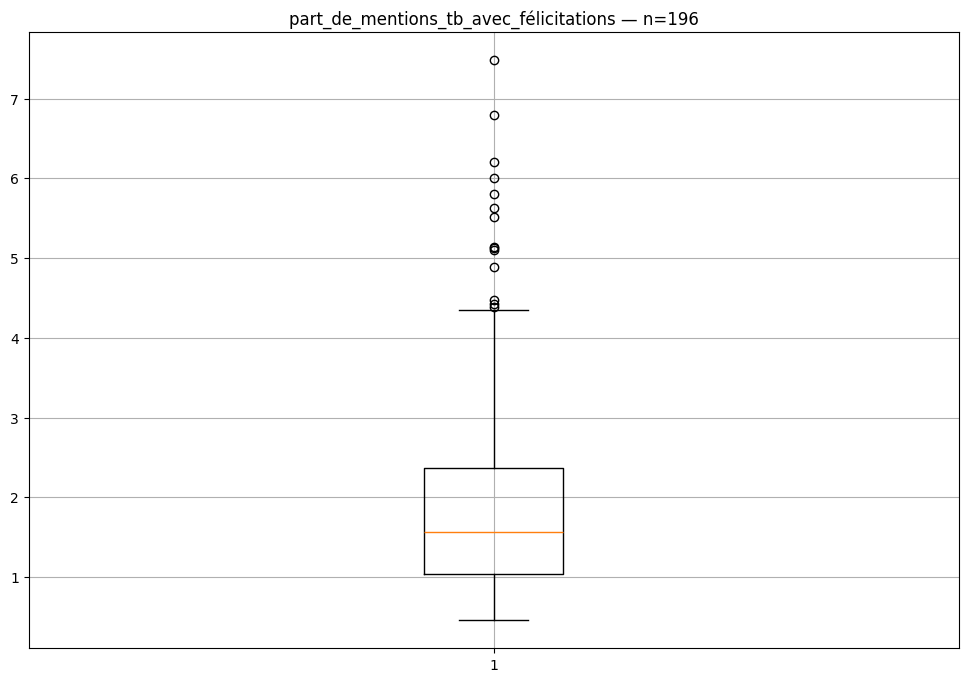

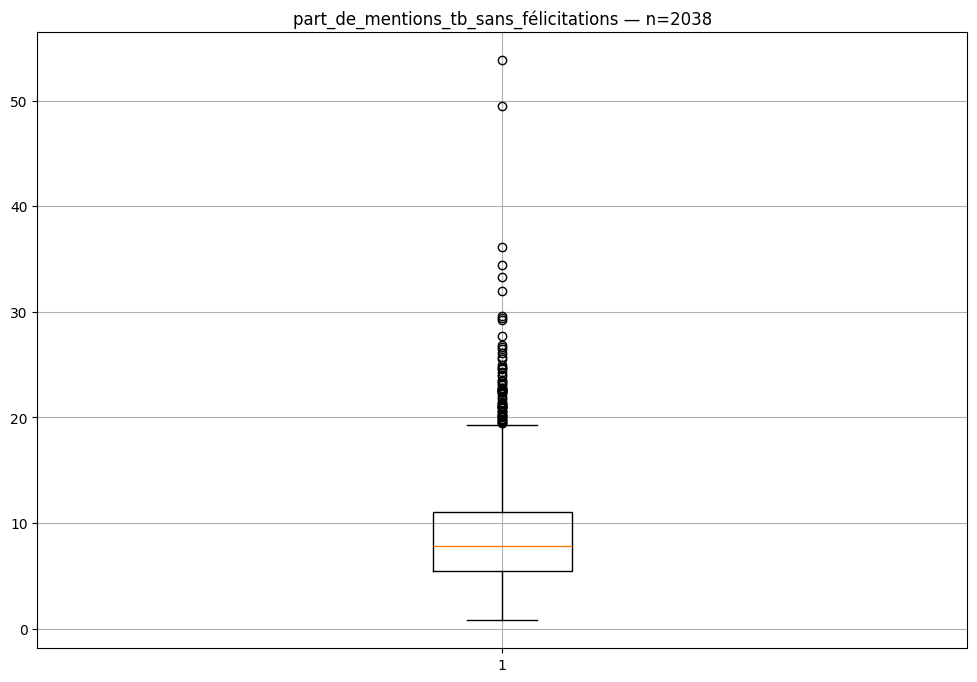

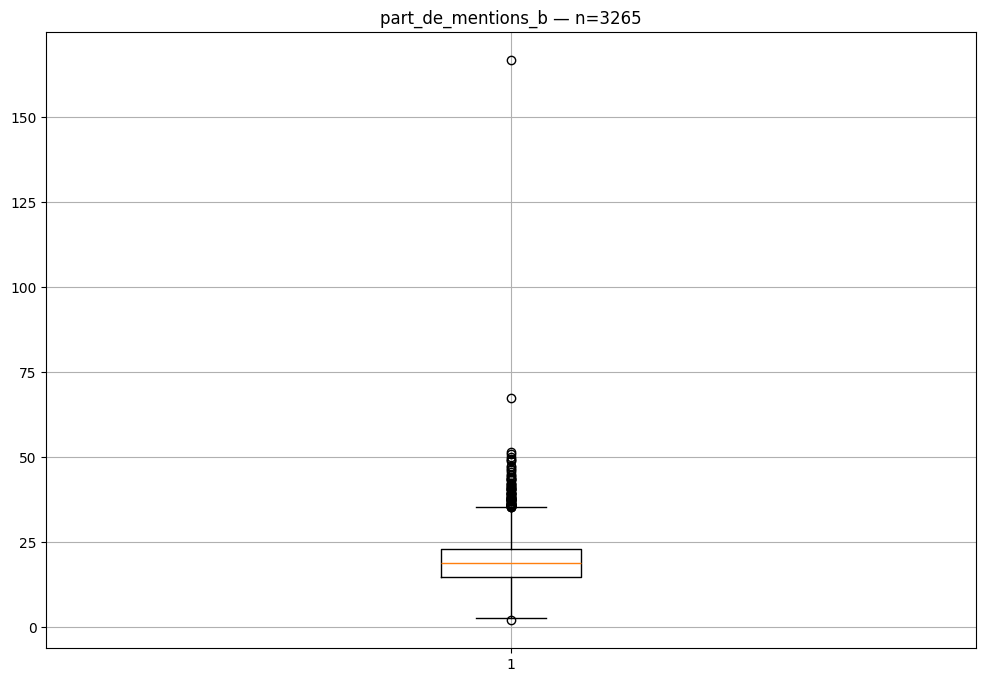

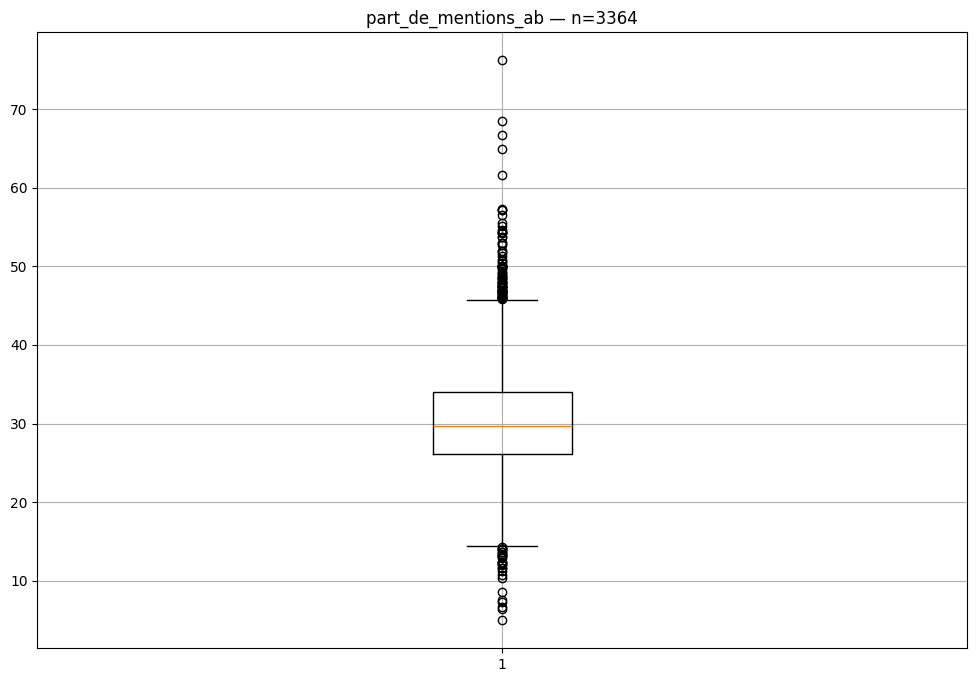

In [446]:
import matplotlib.pyplot as plt

for col in indicateurs:
    if col in df.columns:
        col_data = df[col].dropna()

        if len(col_data) > 10 and col_data.nunique() > 1:  # au moins 10 valeurs non nulles et variées
            plt.figure(figsize=(12, 8))
            plt.boxplot(col_data)
            plt.title(f'{col} — n={len(col_data)}')
            plt.grid(True)
            plt.show()
        else:
            print(f"⏭️ Skipped {col} — Pas assez de données (n={len(col_data)}, unique={col_data.nunique()})")
    else:
        print(f"❌ Colonne introuvable : {col}")

In [449]:
# Aggrégation par région
df_region = df.groupby('region').agg({
    'taux_de_reussite' : 'mean'
    ,'taux_de_mentions' : 'mean'
    ,'part_bacheliers_sortants_2de_1re_term' : 'mean'
    ,'part_bacheliers_sortants_term' : 'mean'
    ,'taux_d_acces_2nde_bac' : 'mean'
    ,'taux_d_acces_1ere_bac' : 'mean'
    ,'taux_d_acces_term_bac' : 'mean'
    ,'VA_du_taux_de_reussite' : 'mean'
    ,'VA_du_taux_d_acces_2nde_bac' : 'mean'
    ,'VA_du_taux_de_mentions' : 'mean'
    ,'VA_du_taux_d_acces_1ere_bac' : 'mean'
    ,'VA_du_taux_d_acces_term_bac' : 'mean'
    ,'part_de_mentions_tb_avec_félicitations' : 'mean'
    ,'part_de_mentions_tb_sans_félicitations' : 'mean'
    ,'part_de_mentions_b' : 'mean'
    ,'part_de_mentions_ab': 'mean'
})

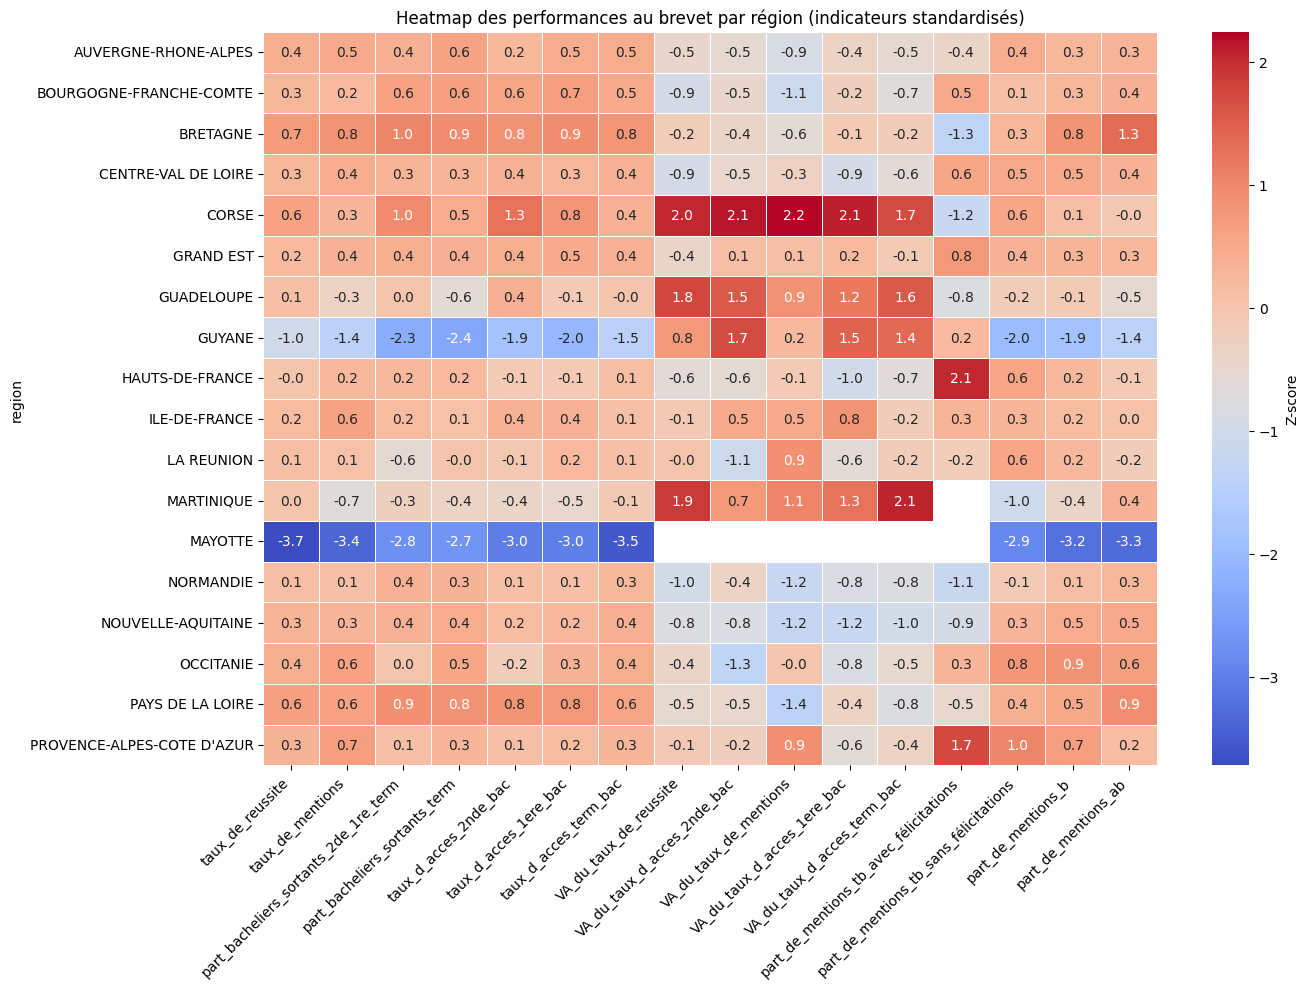

In [450]:
# Optionnel : normalisation pour comparabilité
df_normalized = (df_region - df_region.mean()) / df_region.std()

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_normalized, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5, cbar_kws={'label': 'Z-score'})
plt.title('Heatmap des performances au brevet par région (indicateurs standardisés)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Dashboard principal : Performance au baccalauréat

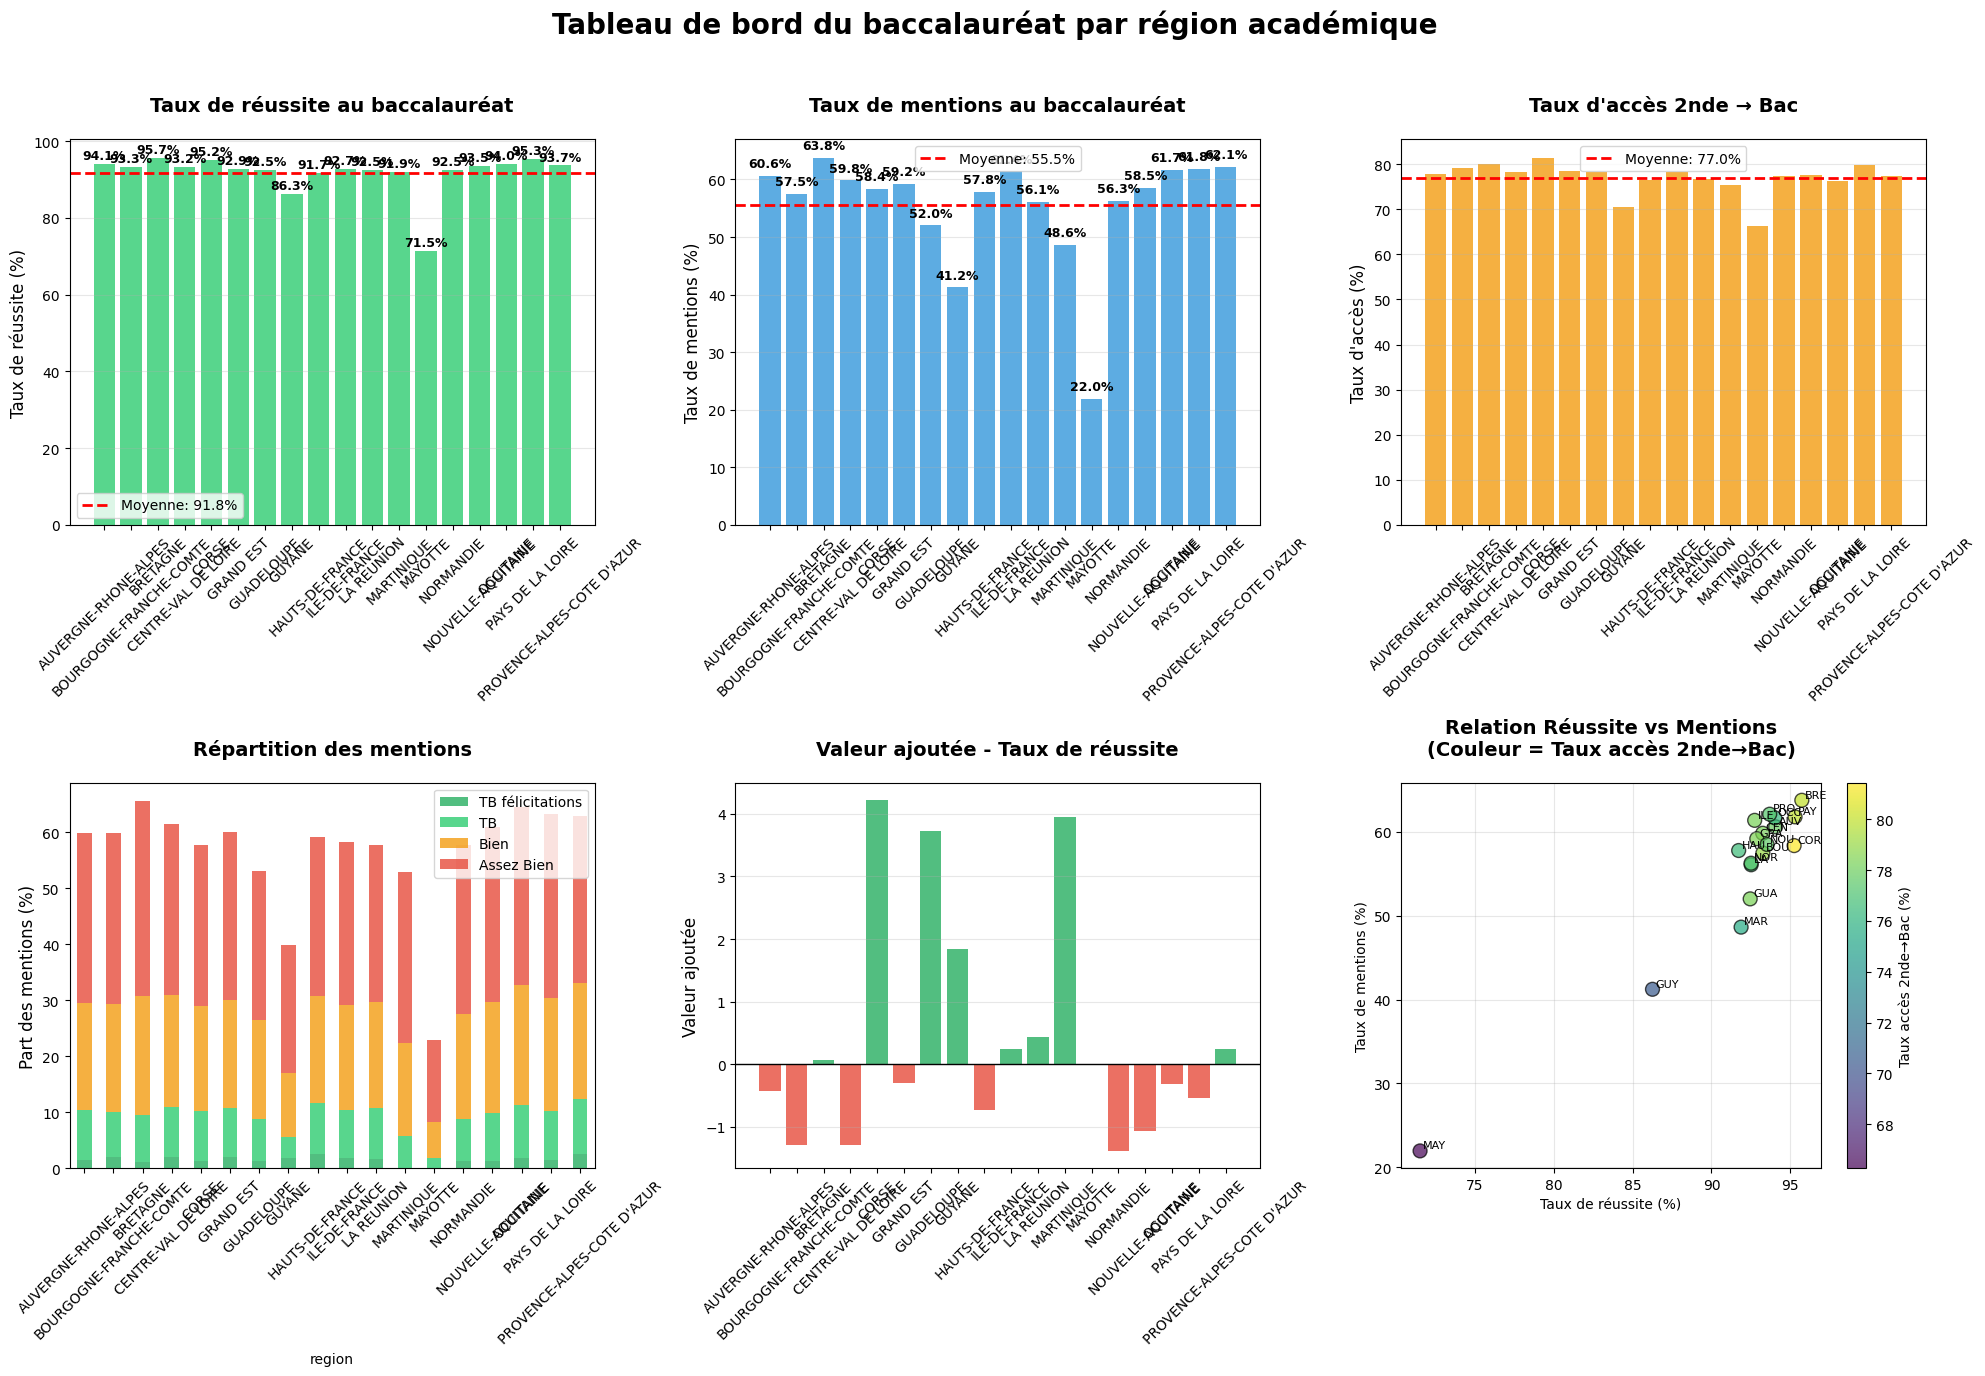

In [451]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df_bac = df_region

# Dashboard principal
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
axes = axes.flatten()

# Graphique 1 : Taux de réussite par région
ax1 = axes[0]
bars1 = ax1.bar(df_bac.index, df_bac['taux_de_reussite'],
                color='#2ecc71', alpha=0.8)
ax1.set_title('Taux de réussite au baccalauréat', fontsize=14, fontweight='bold', pad=20)
ax1.set_ylabel('Taux de réussite (%)', fontsize=12)
ax1.tick_params(axis='x', labelrotation=45, labelsize=10)
ax1.grid(axis='y', alpha=0.3)

moyenne_reussite = df_bac['taux_de_reussite'].mean()
ax1.axhline(y=moyenne_reussite, color='red', linestyle='--', linewidth=2,
            label=f'Moyenne: {moyenne_reussite:.1f}%')
ax1.legend()

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Graphique 2 : Taux de mentions
ax2 = axes[1]
bars2 = ax2.bar(df_bac.index, df_bac['taux_de_mentions'],
                color='#3498db', alpha=0.8)
ax2.set_title('Taux de mentions au baccalauréat', fontsize=14, fontweight='bold', pad=20)
ax2.set_ylabel('Taux de mentions (%)', fontsize=12)
ax2.tick_params(axis='x', labelrotation=45, labelsize=10)
ax2.grid(axis='y', alpha=0.3)

moyenne_mentions = df_bac['taux_de_mentions'].mean()
ax2.axhline(y=moyenne_mentions, color='red', linestyle='--', linewidth=2,
            label=f'Moyenne: {moyenne_mentions:.1f}%')
ax2.legend()

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Graphique 3 : Taux d'accès 2nde→Bac
ax3 = axes[2]
bars3 = ax3.bar(df_bac.index, df_bac['taux_d_acces_2nde_bac'],
                color='#f39c12', alpha=0.8)
ax3.set_title('Taux d\'accès 2nde → Bac', fontsize=14, fontweight='bold', pad=20)
ax3.set_ylabel('Taux d\'accès (%)', fontsize=12)
ax3.tick_params(axis='x', labelrotation=45, labelsize=10)
ax3.grid(axis='y', alpha=0.3)

moyenne_acces = df_bac['taux_d_acces_2nde_bac'].mean()
ax3.axhline(y=moyenne_acces, color='red', linestyle='--', linewidth=2,
            label=f'Moyenne: {moyenne_acces:.1f}%')
ax3.legend()

# Graphique 4 : Répartition des mentions (stacked)
ax4 = axes[3]
mentions_cols = ['part_de_mentions_tb_avec_félicitations', 'part_de_mentions_tb_sans_félicitations',
                'part_de_mentions_b', 'part_de_mentions_ab']
mentions_data = df_bac[mentions_cols].fillna(0)
mentions_data.plot(kind='bar', stacked=True, ax=ax4,
                   color=['#27ae60', '#2ecc71', '#f39c12', '#e74c3c'], alpha=0.8)
ax4.set_title('Répartition des mentions', fontsize=14, fontweight='bold', pad=20)
ax4.set_ylabel('Part des mentions (%)', fontsize=12)
ax4.tick_params(axis='x', labelrotation=45, labelsize=10)
ax4.legend(['TB félicitations', 'TB', 'Bien', 'Assez Bien'], loc='upper right')

# Graphique 5 : Valeur ajoutée taux de réussite
ax5 = axes[4]
va_reussite = df_bac['VA_du_taux_de_reussite'].fillna(0)
colors = ['#27ae60' if x >= 0 else '#e74c3c' for x in va_reussite]
bars5 = ax5.bar(df_bac.index, va_reussite, color=colors, alpha=0.8)
ax5.set_title('Valeur ajoutée - Taux de réussite', fontsize=14, fontweight='bold', pad=20)
ax5.set_ylabel('Valeur ajoutée', fontsize=12)
ax5.tick_params(axis='x', labelrotation=45, labelsize=10)
ax5.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax5.grid(axis='y', alpha=0.3)

# Graphique 6 : Relation Réussite vs Mentions
ax6 = axes[5]
scatter = ax6.scatter(df_bac['taux_de_reussite'], df_bac['taux_de_mentions'],
                     s=100, alpha=0.7, c=df_bac['taux_d_acces_2nde_bac'],
                     cmap='viridis', edgecolors='black')

for region, row in df_bac.iterrows():
    ax6.annotate(region[:3], (row['taux_de_reussite'], row['taux_de_mentions']),
                xytext=(2, 2), textcoords='offset points', fontsize=8)

ax6.set_title('Relation Réussite vs Mentions\n(Couleur = Taux accès 2nde→Bac)',
              fontsize=14, fontweight='bold', pad=20)
ax6.set_xlabel('Taux de réussite (%)')
ax6.set_ylabel('Taux de mentions (%)')
ax6.grid(True, alpha=0.3)

cbar = plt.colorbar(scatter, ax=ax6)
cbar.set_label('Taux accès 2nde→Bac (%)')

plt.suptitle('Tableau de bord du baccalauréat par région académique',
             fontsize=20, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Analyse des valeurs ajoutées

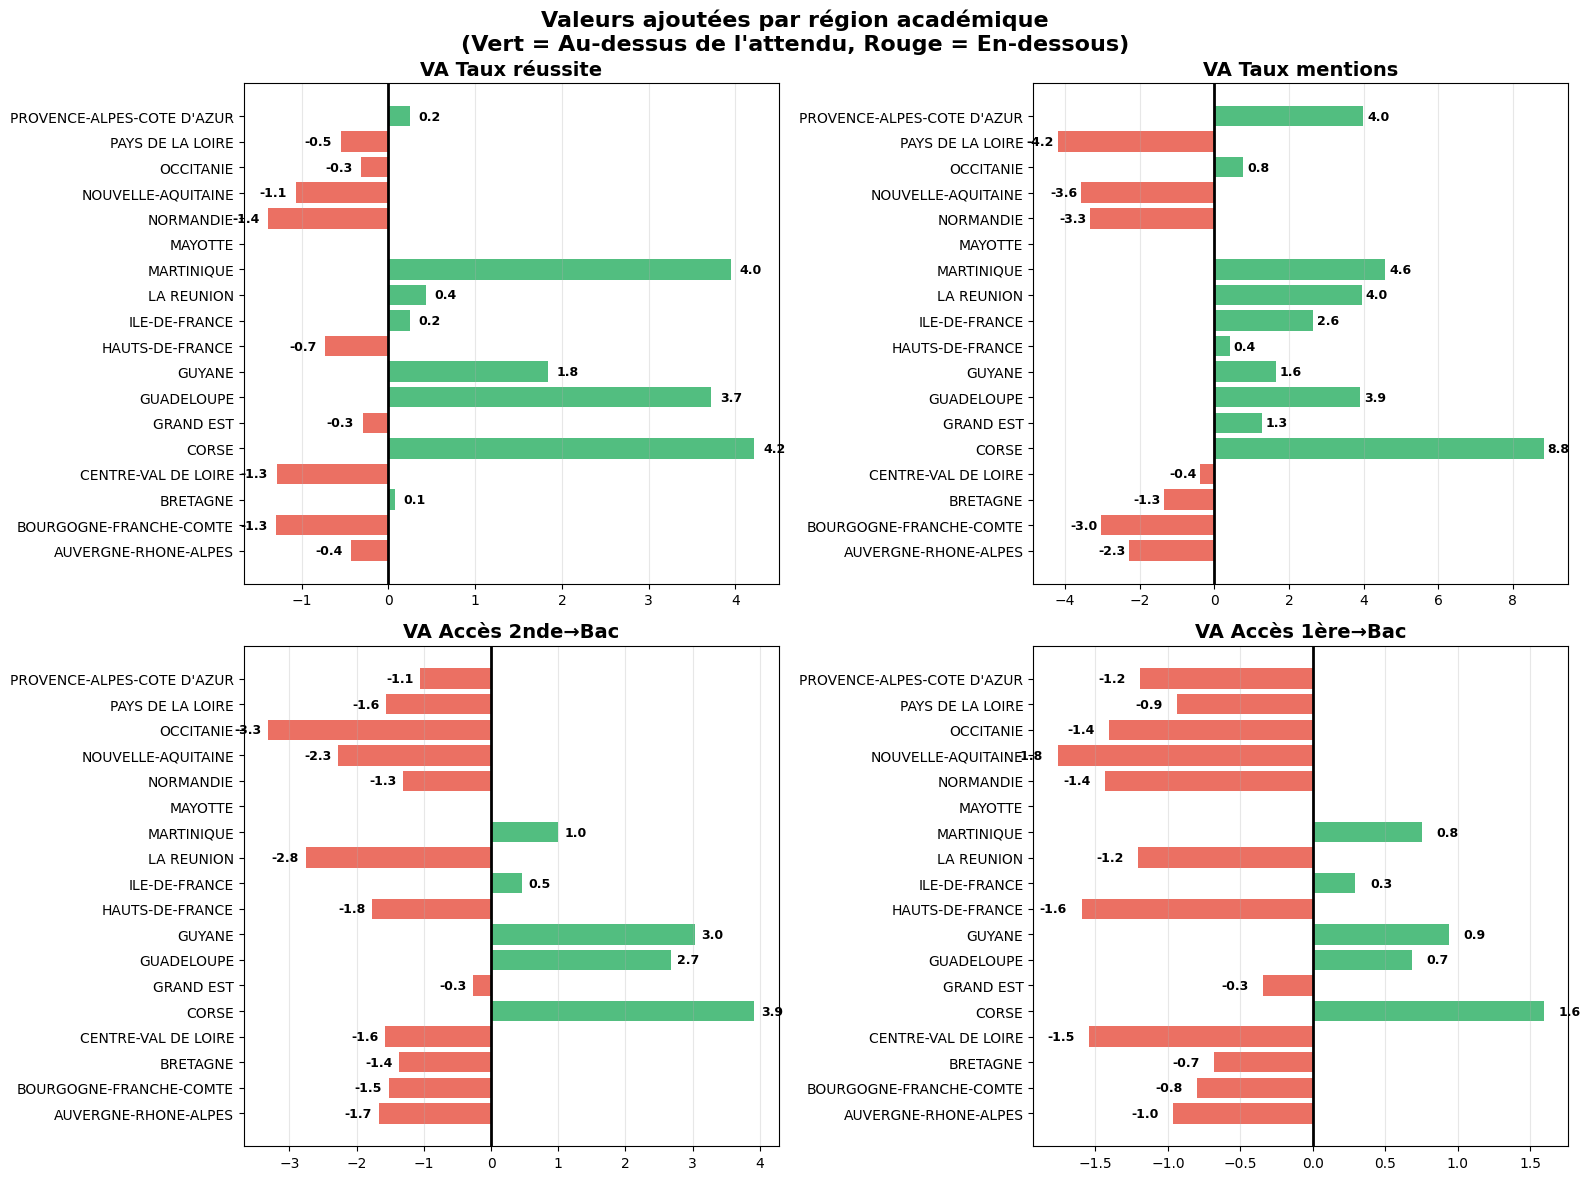

In [452]:
# Focus sur les valeurs ajoutées
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

va_cols = ['VA_du_taux_de_reussite', 'VA_du_taux_de_mentions',
          'VA_du_taux_d_acces_2nde_bac', 'VA_du_taux_d_acces_1ere_bac']
va_titles = ['VA Taux réussite', 'VA Taux mentions', 'VA Accès 2nde→Bac', 'VA Accès 1ère→Bac']

for i, (col, title) in enumerate(zip(va_cols, va_titles)):
    ax = axes[i//2, i%2]

    # Données en supprimant les NaN
    data = df_bac[col].fillna(0)
    colors = ['#27ae60' if x >= 0 else '#e74c3c' for x in data]

    bars = ax.barh(range(len(data)), data, color=colors, alpha=0.8)
    ax.set_yticks(range(len(data)))
    ax.set_yticklabels(data.index, fontsize=10)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.axvline(x=0, color='black', linestyle='-', linewidth=2)
    ax.grid(axis='x', alpha=0.3)

    # Ajouter les valeurs
    for j, (bar, val) in enumerate(zip(bars, data)):
        if val != 0:
            ax.text(val + (0.1 if val >= 0 else -0.1), bar.get_y() + bar.get_height()/2,
                   f'{val:.1f}', va='center', ha='left' if val >= 0 else 'right',
                   fontweight='bold', fontsize=9)

plt.suptitle('Valeurs ajoutées par région académique\n(Vert = Au-dessus de l\'attendu, Rouge = En-dessous)',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Heatmap de performance avec normalisation

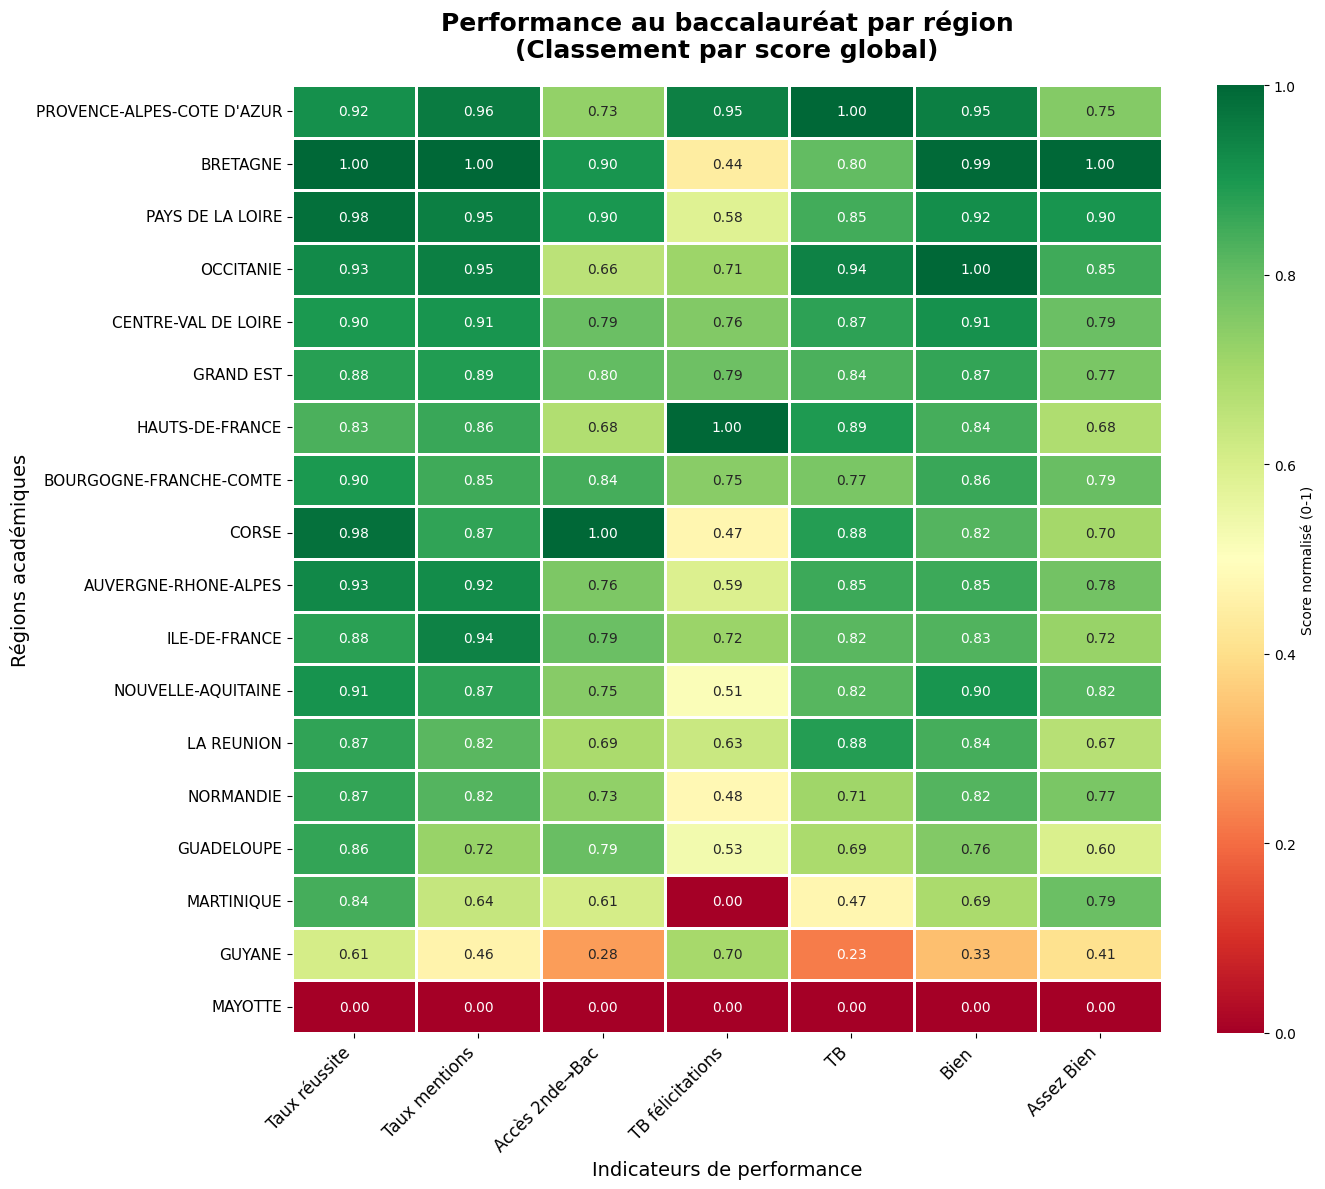

🎓 CLASSEMENT GLOBAL - BACCALAURÉAT
🥇 PROVENCE-ALPES-COTE D'AZUR     0.894
🥈 BRETAGNE                       0.878
🥉 PAYS DE LA LOIRE               0.870
 4. OCCITANIE                      0.864
 5. CENTRE-VAL DE LOIRE            0.847
 6. GRAND EST                      0.833
 7. HAUTS-DE-FRANCE                0.826
 8. BOURGOGNE-FRANCHE-COMTE        0.822
 9. CORSE                          0.819
10. AUVERGNE-RHONE-ALPES           0.814
11. ILE-DE-FRANCE                  0.813
12. NOUVELLE-AQUITAINE             0.798
13. LA REUNION                     0.771
14. NORMANDIE                      0.743
15. GUADELOUPE                     0.708
16. MARTINIQUE                     0.576
17. GUYANE                         0.431
18. MAYOTTE                        0.000


In [453]:
from sklearn.preprocessing import MinMaxScaler

# Sélectionner les indicateurs clés de performance
perf_cols = ['taux_de_reussite', 'taux_de_mentions', 'taux_d_acces_2nde_bac',
            'part_de_mentions_tb_avec_félicitations', 'part_de_mentions_tb_sans_félicitations',
            'part_de_mentions_b', 'part_de_mentions_ab']

df_perf_bac = df_bac[perf_cols].fillna(0)

# Normalisation
scaler = MinMaxScaler()
df_scaled_bac = pd.DataFrame(scaler.fit_transform(df_perf_bac),
                            index=df_perf_bac.index,
                            columns=df_perf_bac.columns)

# Score global
df_scaled_bac['Score_global'] = df_scaled_bac.mean(axis=1)
df_final_bac = df_scaled_bac.sort_values('Score_global', ascending=False)
df_heatmap_bac = df_final_bac.drop('Score_global', axis=1)

# Renommer pour plus de clarté
colonnes_bac = {
    'taux_de_reussite': 'Taux réussite',
    'taux_de_mentions': 'Taux mentions',
    'taux_d_acces_2nde_bac': 'Accès 2nde→Bac',
    'part_de_mentions_tb_avec_félicitations': 'TB félicitations',
    'part_de_mentions_tb_sans_félicitations': 'TB',
    'part_de_mentions_b': 'Bien',
    'part_de_mentions_ab': 'Assez Bien'
}

df_heatmap_bac = df_heatmap_bac.rename(columns=colonnes_bac)

plt.figure(figsize=(14, 12))
sns.heatmap(df_heatmap_bac,
            cmap="RdYlGn",
            linewidths=0.8,
            annot=True,
            fmt=".2f",
            cbar_kws={'label': 'Score normalisé (0-1)'})

plt.title("Performance au baccalauréat par région\n(Classement par score global)",
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Indicateurs de performance", fontsize=14)
plt.ylabel("Régions académiques", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()

# Classement
print("🎓 CLASSEMENT GLOBAL - BACCALAURÉAT")
print("="*40)
for i, (region, score) in enumerate(df_final_bac['Score_global'].items(), 1):
    emoji = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else f"{i:2d}."
    print(f"{emoji} {region:<30} {score:.3f}")

### Analyse comparative Outre-mer vs Métropole

/tmp/ipython-input-454-2971457022.py:22: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.

/tmp/ipython-input-454-2971457022.py:22: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.

/tmp/ipython-input-454-2971457022.py:22: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



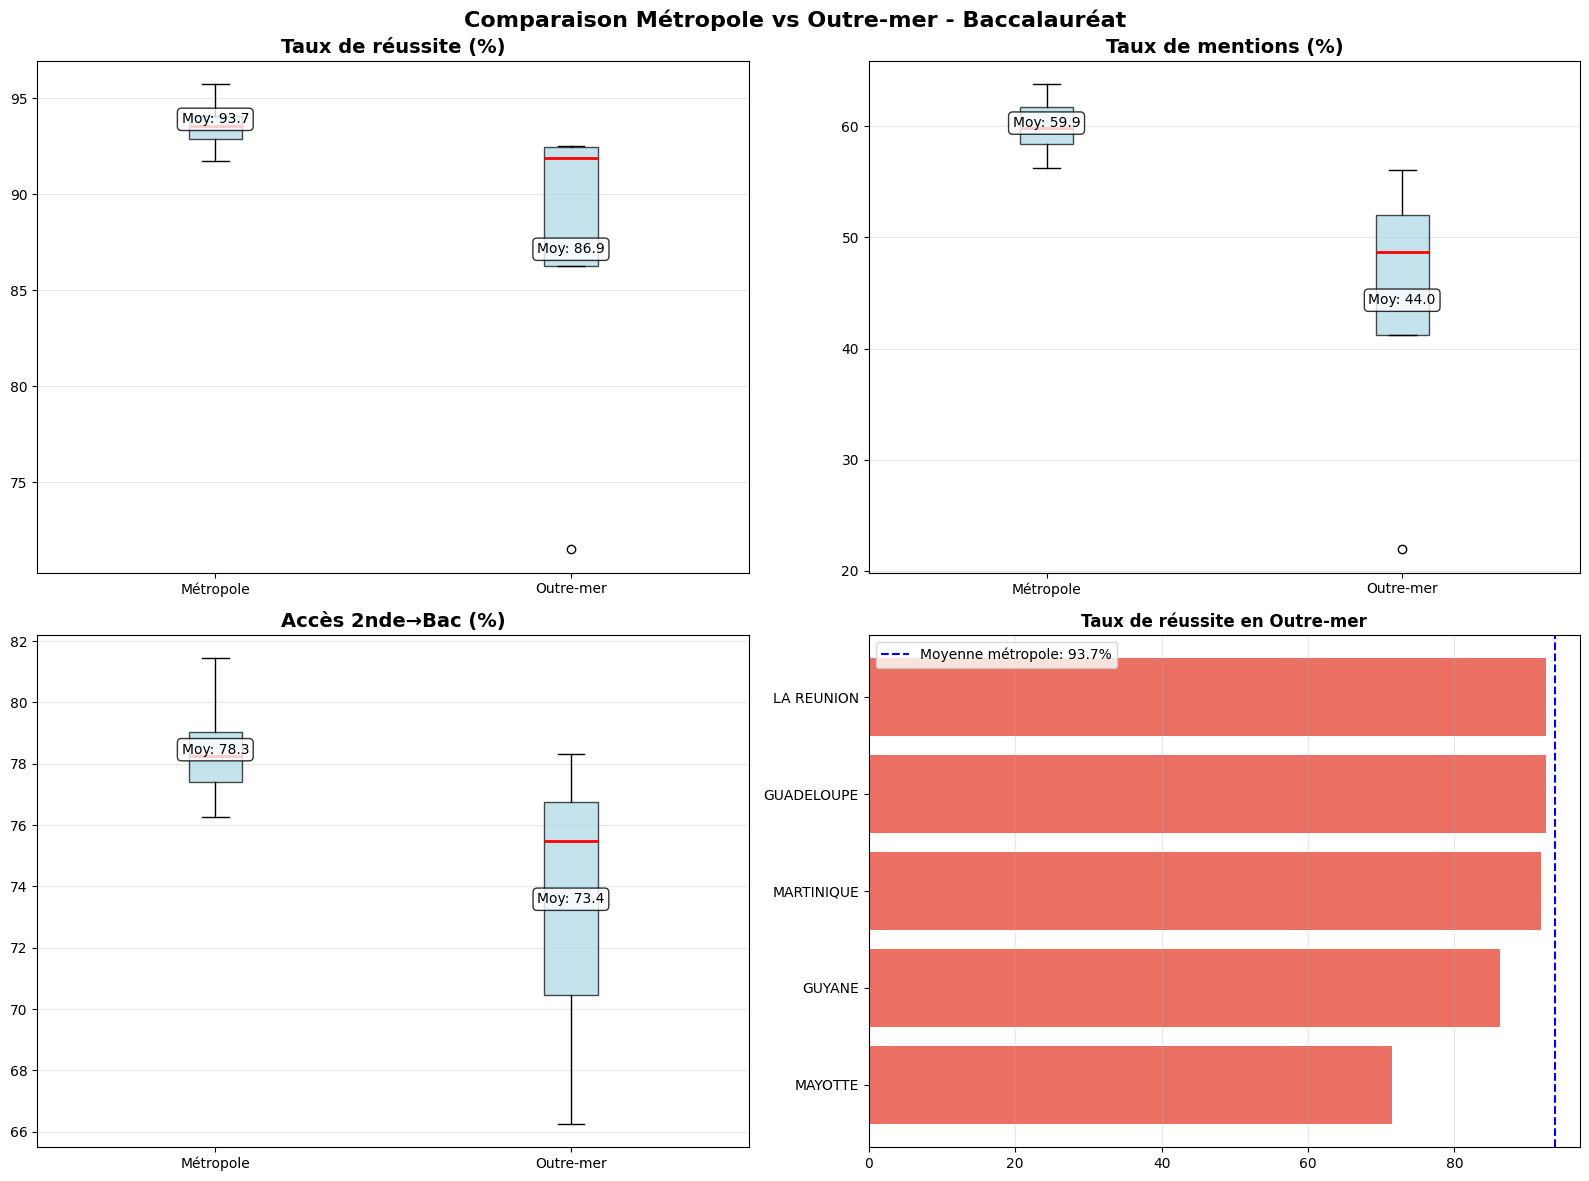

In [454]:
# Identifier les régions
outre_mer = ['GUADELOUPE', 'GUYANE', 'LA REUNION', 'MARTINIQUE', 'MAYOTTE']
metropole = [region for region in df_bac.index if region not in outre_mer]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Indicateurs à comparer
indicateurs = ['taux_de_reussite', 'taux_de_mentions', 'taux_d_acces_2nde_bac']
titres = ['Taux de réussite (%)', 'Taux de mentions (%)', 'Accès 2nde→Bac (%)']

for i, (indic, titre) in enumerate(zip(indicateurs, titres)):
    ax = axes[i//2, i%2]

    # Moyennes
    moy_metro = df_bac.loc[metropole, indic].mean()
    moy_om = df_bac.loc[outre_mer, indic].mean()

    # Boxplots
    data_metro = df_bac.loc[metropole, indic]
    data_om = df_bac.loc[outre_mer, indic]

    ax.boxplot([data_metro, data_om], labels=['Métropole', 'Outre-mer'],
               patch_artist=True,
               boxprops=dict(facecolor='lightblue', alpha=0.7),
               medianprops=dict(color='red', linewidth=2))

    ax.set_title(titre, fontsize=14, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

    # Ajouter les moyennes
    ax.text(1, moy_metro, f'Moy: {moy_metro:.1f}', ha='center',
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    ax.text(2, moy_om, f'Moy: {moy_om:.1f}', ha='center',
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Graphique 4 : Détail par territoire OM
ax4 = axes[1, 1]
data_om_detail = df_bac.loc[outre_mer, 'taux_de_reussite'].sort_values()
bars = ax4.barh(range(len(data_om_detail)), data_om_detail.values,
                color='#e74c3c', alpha=0.8)
ax4.set_yticks(range(len(data_om_detail)))
ax4.set_yticklabels(data_om_detail.index)
ax4.set_title('Taux de réussite en Outre-mer', fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

moyenne_metro = df_bac.loc[metropole, 'taux_de_reussite'].mean()
ax4.axvline(x=moyenne_metro, color='blue', linestyle='--',
           label=f'Moyenne métropole: {moyenne_metro:.1f}%')
ax4.legend()

plt.suptitle('Comparaison Métropole vs Outre-mer - Baccalauréat',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Analyse des parcours (2nde → 1ère → Terminale → Bac)

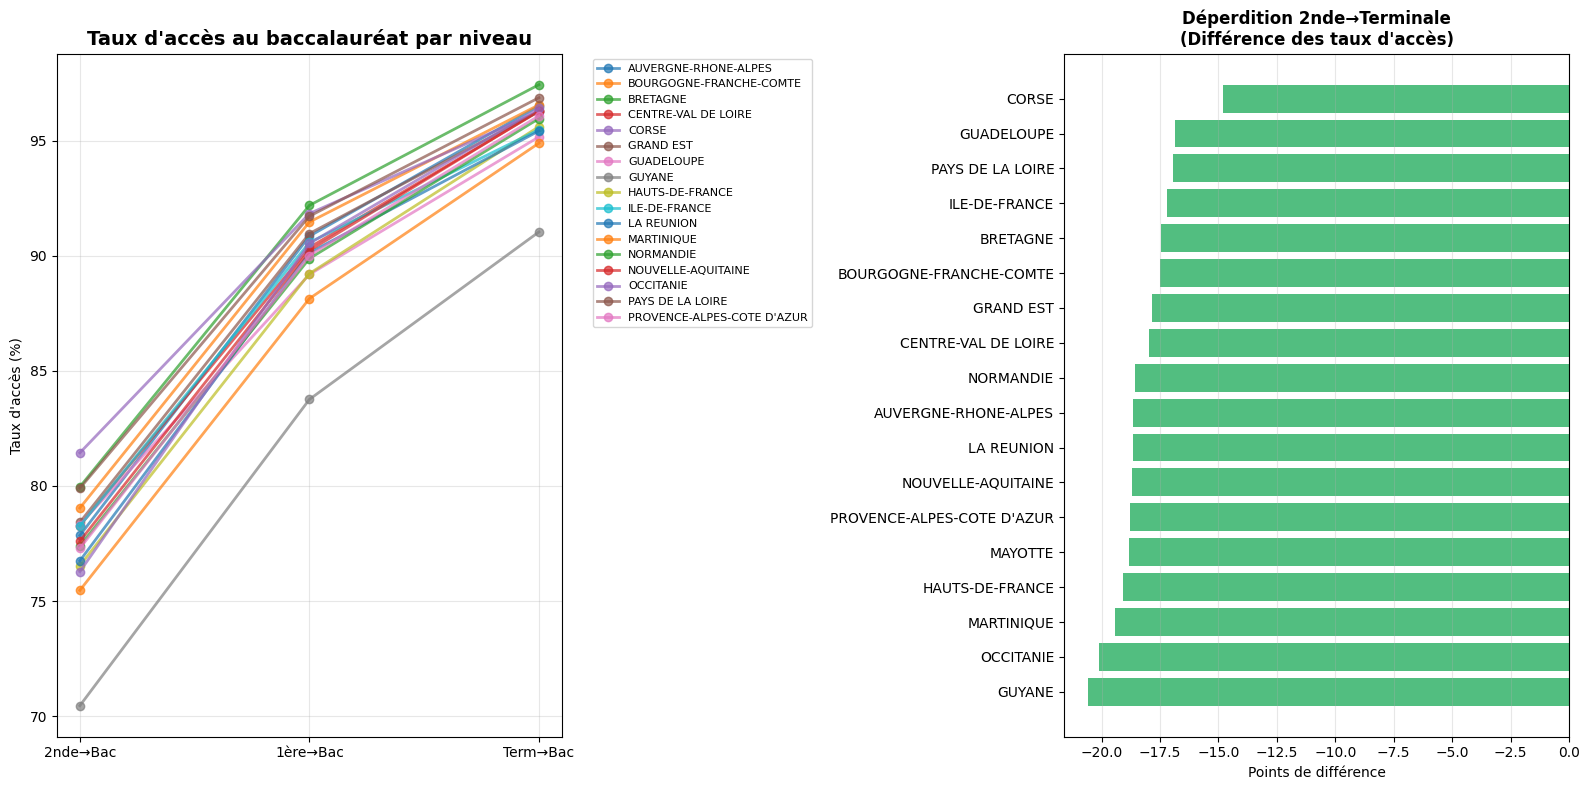

In [455]:
# Analyser la "pipeline" scolaire
parcours_cols = ['taux_d_acces_2nde_bac', 'taux_d_acces_1ere_bac', 'taux_d_acces_term_bac']
parcours_names = ['2nde→Bac', '1ère→Bac', 'Term→Bac']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Graphique 1 : Évolution des taux d'accès
for region in df_bac.index:
    if region not in ['MAYOTTE']:  # Exclure Mayotte qui a des NaN
        values = [df_bac.loc[region, col] for col in parcours_cols]
        ax1.plot(parcours_names, values, 'o-', label=region, alpha=0.7, linewidth=2)

ax1.set_title('Taux d\'accès au baccalauréat par niveau', fontsize=14, fontweight='bold')
ax1.set_ylabel('Taux d\'accès (%)')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax1.grid(True, alpha=0.3)

# Graphique 2 : "Déperdition" entre 2nde et Terminale
df_bac['deperdition'] = df_bac['taux_d_acces_2nde_bac'] - df_bac['taux_d_acces_term_bac']
deperdition_sorted = df_bac['deperdition'].fillna(0).sort_values()

colors = ['#27ae60' if x <= 2 else '#f39c12' if x <= 5 else '#e74c3c' for x in deperdition_sorted]
bars = ax2.barh(range(len(deperdition_sorted)), deperdition_sorted.values,
                color=colors, alpha=0.8)

ax2.set_yticks(range(len(deperdition_sorted)))
ax2.set_yticklabels(deperdition_sorted.index, fontsize=10)
ax2.set_title('Déperdition 2nde→Terminale\n(Différence des taux d\'accès)', fontweight='bold')
ax2.set_xlabel('Points de différence')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()